##### Import libraraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

%matplotlib inline
import re

import warnings
warnings.filterwarnings('ignore')

##### Import data

In [2]:
df= pd.read_csv('power_generation.csv')

##### Load data

In [3]:
df.head(40)

,Country,Country code,State,State code,State type,Date,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Aggregate fuel,Clean,MW,NaN,NaN,NaN
1,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Aggregate fuel,Fossil,MW,NaN,NaN,NaN
2,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Aggregate fuel,Gas and Other Fossil,MW,NaN,NaN,NaN
3,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",MW,NaN,NaN,NaN
4,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Aggregate fuel,Renewables,MW,NaN,NaN,NaN
5,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Aggregate fuel,Wind and Solar,MW,NaN,NaN,NaN
6,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Fuel,Bioenergy,MW,NaN,NaN,NaN
7,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Fuel,Coal,MW,NaN,NaN,NaN
8,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Fuel,Gas,MW,NaN,NaN,NaN
9,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Capacity,Fuel,Hydro,MW,NaN,NaN,NaN


### Exploratory Data Analysis

In [4]:
df.shape

(212766, 13)

In [5]:
df['Category'].value_counts()

Category
Power sector emissions    87308
Electricity generation    84556
Capacity                  40902
Name: count, dtype: int64

In [6]:
df['Subcategory'].value_counts()

Subcategory
Fuel              122580
Aggregate fuel     81930
Total               5504
CO2 intensity       2752
Name: count, dtype: int64

In [7]:
df['Variable'].value_counts()

Variable
Clean                                    13760
Bioenergy                                13760
Wind                                     13760
Solar                                    13760
Other Renewables                         13760
Hydro                                    13760
Wind and Solar                           13760
Renewables                               13760
Hydro, Bioenergy and Other Renewables    13760
Coal                                     13445
Gas                                      13445
Fossil                                   13445
Nuclear                                  13445
Other Fossil                             13445
Gas and Other Fossil                     13445
Total Generation                          2752
CO2 intensity                             2752
Total emissions                           2752
Name: count, dtype: int64

In [8]:
df['Unit'].value_counts()

Unit
%           81804
GWh         43654
ktCO2       43654
MW          40902
gCO2/kWh     2752
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Country                     0
Country code                0
State                       0
State code                  0
State type                  0
Date                        0
Category                    0
Subcategory                 0
Variable                    0
Unit                        0
Value                    3084
YoY absolute change    105954
YoY % change           147827
dtype: int64

In [10]:
df.describe()

,Value,YoY absolute change,YoY % change
count,209682.000000,106812.000000,6.493900e+04
mean,1399.789297,116.331586,1.323144e+02
std,9522.607801,1060.786316,1.266901e+04
min,0.000000,-28509.110000,-1.000000e+02
25%,0.000000,0.000000,-2.220000e+00
50%,1.020000,0.000000,1.350000e+00
75%,93.270000,2.892500,1.831000e+01
max,247580.470000,38026.540000,2.239900e+06


In [11]:
df.duplicated().sum()

0

### Data Preprocessing 

In [12]:
df_new= df[df['Category']!= 'Capacity']                  

In [13]:
df_new = df_new[df_new['Subcategory'] != 'Aggregate fuel']
df_new = df_new[df_new['Subcategory'] != 'Total']


In [14]:
df_new.drop(columns=['YoY absolute change', 'YoY % change'], inplace=True)

In [15]:
df_new.shape

(100816, 11)

In [16]:
df_new.Unit.value_counts()

Unit
%           49032
GWh         24516
ktCO2       24516
gCO2/kWh     2752
Name: count, dtype: int64

In [17]:

df_value = df_new[df_new['Unit'].isin(['GWh', 'MW','ktCO2', 'gCO2/kWh'])].copy()   # main data



In [18]:
df_value.Unit.value_counts()

Unit
GWh         24516
ktCO2       24516
gCO2/kWh     2752
Name: count, dtype: int64

In [19]:
df_value.shape

(51784, 11)

In [20]:
df_value.head(20)

,Country,Country code,State,State code,State type,Date,Category,Subcategory,Variable,Unit,Value
36,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Bioenergy,GWh,0.00
37,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Coal,GWh,0.00
38,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Gas,GWh,0.00
39,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Hydro,GWh,1.12
40,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Nuclear,GWh,0.00
41,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Other Fossil,GWh,6.88
42,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Other Renewables,GWh,0.00
43,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Solar,GWh,1.44
44,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Electricity generation,Fuel,Wind,GWh,0.00
58,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,Power sector emissions,CO2 intensity,CO2 intensity,gCO2/kWh,521.19


In [21]:
# Create a unique identifier for each metric column
df_value['Feature'] = df_value['Category'] + ' - ' + df_value['Subcategory'] + ' - ' + df_value['Variable'] + ' - ' + df_value['Unit']

# Pivot the table
df_wide = df_value.pivot_table(index=['Country', 'Country code', 'State', 'State code', 'State type', 'Date'],
                         columns='Feature', values='Value').reset_index()


In [22]:
df_wide.head()

Feature,Country,Country code,State,State code,State type,Date,Electricity generation - Fuel - Bioenergy - GWh,Electricity generation - Fuel - Coal - GWh,Electricity generation - Fuel - Gas - GWh,Electricity generation - Fuel - Hydro - GWh,...,Power sector emissions - CO2 intensity - CO2 intensity - gCO2/kWh,Power sector emissions - Fuel - Bioenergy - ktCO2,Power sector emissions - Fuel - Coal - ktCO2,Power sector emissions - Fuel - Gas - ktCO2,Power sector emissions - Fuel - Hydro - ktCO2,Power sector emissions - Fuel - Nuclear - ktCO2,Power sector emissions - Fuel - Other Fossil - ktCO2,Power sector emissions - Fuel - Other Renewables - ktCO2,Power sector emissions - Fuel - Solar - ktCO2,Power sector emissions - Fuel - Wind - ktCO2
0,India,IND,Andaman and Nicobar,AN,Union territory,2019-01-01,0.0,0.0,0.0,1.12,...,521.19,0.0,0.0,0.0,0.03,0.0,4.82,0.0,0.07,0.0
1,India,IND,Andaman and Nicobar,AN,Union territory,2019-02-01,0.0,0.0,0.0,0.99,...,513.99,0.0,0.0,0.0,0.02,0.0,4.86,0.0,0.08,0.0
2,India,IND,Andaman and Nicobar,AN,Union territory,2019-03-01,0.0,0.0,0.0,1.07,...,495.52,0.0,0.0,0.0,0.03,0.0,4.85,0.0,0.10,0.0
3,India,IND,Andaman and Nicobar,AN,Union territory,2019-04-01,0.0,0.0,0.0,0.63,...,550.44,0.0,0.0,0.0,0.02,0.0,6.11,0.0,0.09,0.0
4,India,IND,Andaman and Nicobar,AN,Union territory,2019-05-01,0.0,0.0,0.0,0.13,...,583.67,0.0,0.0,0.0,0.00,0.0,5.78,0.0,0.08,0.0


In [23]:
df_wide.to_excel("power_data.xlsx", index=False)


In [24]:
df_wide.shape

(2752, 25)

In [25]:
df_wide.columns

Index(['Country', 'Country code', 'State', 'State code', 'State type', 'Date',
       'Electricity generation - Fuel - Bioenergy - GWh',
       'Electricity generation - Fuel - Coal - GWh',
       'Electricity generation - Fuel - Gas - GWh',
       'Electricity generation - Fuel - Hydro - GWh',
       'Electricity generation - Fuel - Nuclear - GWh',
       'Electricity generation - Fuel - Other Fossil - GWh',
       'Electricity generation - Fuel - Other Renewables - GWh',
       'Electricity generation - Fuel - Solar - GWh',
       'Electricity generation - Fuel - Wind - GWh',
       'Power sector emissions - CO2 intensity - CO2 intensity - gCO2/kWh',
       'Power sector emissions - Fuel - Bioenergy - ktCO2',
       'Power sector emissions - Fuel - Coal - ktCO2',
       'Power sector emissions - Fuel - Gas - ktCO2',
       'Power sector emissions - Fuel - Hydro - ktCO2',
       'Power sector emissions - Fuel - Nuclear - ktCO2',
       'Power sector emissions - Fuel - Other Fossil - k

In [26]:
df_wide.isnull().sum()

Feature
Country                                                               0
Country code                                                          0
State                                                                 0
State code                                                            0
State type                                                            0
Date                                                                  0
Electricity generation - Fuel - Bioenergy - GWh                       0
Electricity generation - Fuel - Coal - GWh                           63
Electricity generation - Fuel - Gas - GWh                            63
Electricity generation - Fuel - Hydro - GWh                           0
Electricity generation - Fuel - Nuclear - GWh                        63
Electricity generation - Fuel - Other Fossil - GWh                   63
Electricity generation - Fuel - Other Renewables - GWh                0
Electricity generation - Fuel - Solar - GWh             

In [27]:
df_wide[df_wide['State']=='India Total']

Feature,Country,Country code,State,State code,State type,Date,Electricity generation - Fuel - Bioenergy - GWh,Electricity generation - Fuel - Coal - GWh,Electricity generation - Fuel - Gas - GWh,Electricity generation - Fuel - Hydro - GWh,...,Power sector emissions - CO2 intensity - CO2 intensity - gCO2/kWh,Power sector emissions - Fuel - Bioenergy - ktCO2,Power sector emissions - Fuel - Coal - ktCO2,Power sector emissions - Fuel - Gas - ktCO2,Power sector emissions - Fuel - Hydro - ktCO2,Power sector emissions - Fuel - Nuclear - ktCO2,Power sector emissions - Fuel - Other Fossil - ktCO2,Power sector emissions - Fuel - Other Renewables - ktCO2,Power sector emissions - Fuel - Solar - ktCO2,Power sector emissions - Fuel - Wind - ktCO2
962,India,IND,India Total,IN,total,2019-01-01,2582.00,86375.09,3971.55,7790.99,...,669.27,593.86,70827.58,1946.06,186.98,37.44,4.82,1.33,169.67,31.37
963,India,IND,India Total,IN,total,2019-02-01,2186.50,78298.38,3194.95,7506.94,...,661.48,502.90,64204.67,1565.53,180.17,34.55,4.96,1.55,174.26,34.04
964,India,IND,India Total,IN,total,2019-03-01,2070.17,91481.45,3732.91,9156.48,...,664.56,476.14,75014.79,1829.13,219.76,40.27,6.73,1.17,206.78,32.63
965,India,IND,India Total,IN,total,2019-04-01,1436.30,90446.02,4206.71,11587.73,...,648.65,330.35,74165.74,2061.29,278.11,39.45,9.88,1.47,200.70,40.78
966,India,IND,India Total,IN,total,2019-05-01,861.81,94375.57,4451.92,14670.01,...,623.06,198.22,77387.97,2181.44,352.08,45.39,10.30,1.12,208.44,72.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,India,IND,India Total,IN,total,2024-10-01,503.91,111741.72,2330.48,15898.15,...,622.32,115.90,91628.21,1141.94,381.56,57.23,20.66,9.35,588.32,35.62
1032,India,IND,India Total,IN,total,2024-11-01,1302.26,102767.95,1433.56,9483.05,...,640.99,299.52,84269.72,702.44,227.59,57.72,20.94,8.98,539.83,34.20
1033,India,IND,India Total,IN,total,2024-12-01,2285.77,106609.93,1599.60,8552.86,...,636.01,525.73,87420.14,783.80,205.27,61.50,22.39,8.57,513.95,63.22
1034,India,IND,India Total,IN,total,2025-01-01,2397.47,112573.80,1506.89,7999.12,...,641.12,551.42,92310.51,738.38,191.98,57.34,22.08,9.09,589.72,62.01


In [28]:
df_wide.duplicated().sum()

0

In [29]:
df_wide.columns

Index(['Country', 'Country code', 'State', 'State code', 'State type', 'Date',
       'Electricity generation - Fuel - Bioenergy - GWh',
       'Electricity generation - Fuel - Coal - GWh',
       'Electricity generation - Fuel - Gas - GWh',
       'Electricity generation - Fuel - Hydro - GWh',
       'Electricity generation - Fuel - Nuclear - GWh',
       'Electricity generation - Fuel - Other Fossil - GWh',
       'Electricity generation - Fuel - Other Renewables - GWh',
       'Electricity generation - Fuel - Solar - GWh',
       'Electricity generation - Fuel - Wind - GWh',
       'Power sector emissions - CO2 intensity - CO2 intensity - gCO2/kWh',
       'Power sector emissions - Fuel - Bioenergy - ktCO2',
       'Power sector emissions - Fuel - Coal - ktCO2',
       'Power sector emissions - Fuel - Gas - ktCO2',
       'Power sector emissions - Fuel - Hydro - ktCO2',
       'Power sector emissions - Fuel - Nuclear - ktCO2',
       'Power sector emissions - Fuel - Other Fossil - k

In [30]:
# Renaming function

def clean_column(col):
    col = col.lower()
    col = col.replace("electricity generation", "elec_generation")
    col = col.replace("power sector emissions", "emissions")
    col = col.replace("fuel", "")
    col = col.replace("co2 intensity", "co2_intensity")
    col = col.replace("other fossil", "other_fossil")
    col = col.replace("other renewables", "other_renewables")
    col = col.replace(" ", "_")
    col = col.replace("-", "")
    col = col.replace("__", "_")
    return col

# Apply it only to feature columns (not 'state', 'date', etc.)

id_vars = ['country', 'country_code', 'state', 'state_code', 'state_type', 'date']
df_wide.columns = [clean_column(col) if col not in id_vars else col for col in df_wide.columns]


In [31]:
df_wide.columns

Index(['country', 'country_code', 'state', 'state_code', 'state_type', 'date',
       'elec_generation__bioenergy_gwh', 'elec_generation__coal_gwh',
       'elec_generation__gas_gwh', 'elec_generation__hydro_gwh',
       'elec_generation__nuclear_gwh', 'elec_generation__other_fossil_gwh',
       'elec_generation__other_renewables_gwh', 'elec_generation__solar_gwh',
       'elec_generation__wind_gwh',
       'emissions_co2_intensity_co2_intensity_gco2/kwh',
       'emissions__bioenergy_ktco2', 'emissions__coal_ktco2',
       'emissions__gas_ktco2', 'emissions__hydro_ktco2',
       'emissions__nuclear_ktco2', 'emissions__other_fossil_ktco2',
       'emissions__other_renewables_ktco2', 'emissions__solar_ktco2',
       'emissions__wind_ktco2'],
      dtype='object')

In [32]:
df_wide.isnull().sum()

country                                            0
country_code                                       0
state                                              0
state_code                                         0
state_type                                         0
date                                               0
elec_generation__bioenergy_gwh                     0
elec_generation__coal_gwh                         63
elec_generation__gas_gwh                          63
elec_generation__hydro_gwh                         0
elec_generation__nuclear_gwh                      63
elec_generation__other_fossil_gwh                 63
elec_generation__other_renewables_gwh              0
elec_generation__solar_gwh                         0
elec_generation__wind_gwh                          0
emissions_co2_intensity_co2_intensity_gco2/kwh    54
emissions__bioenergy_ktco2                         0
emissions__coal_ktco2                             63
emissions__gas_ktco2                          

In [33]:
# Missing data is for the 1st day of each month . Fill the Nulls with 0


df_wide.fillna(0, inplace=True)
df_wide.isna().sum()

country                                           0
country_code                                      0
state                                             0
state_code                                        0
state_type                                        0
date                                              0
elec_generation__bioenergy_gwh                    0
elec_generation__coal_gwh                         0
elec_generation__gas_gwh                          0
elec_generation__hydro_gwh                        0
elec_generation__nuclear_gwh                      0
elec_generation__other_fossil_gwh                 0
elec_generation__other_renewables_gwh             0
elec_generation__solar_gwh                        0
elec_generation__wind_gwh                         0
emissions_co2_intensity_co2_intensity_gco2/kwh    0
emissions__bioenergy_ktco2                        0
emissions__coal_ktco2                             0
emissions__gas_ktco2                              0
emissions__h

In [34]:
# Convert datetime columns

df_wide['date'] = pd.to_datetime(df_wide['date'])


In [35]:
df_wide[df_wide['state']=="India Total"]

,country,country_code,state,state_code,state_type,date,elec_generation__bioenergy_gwh,elec_generation__coal_gwh,elec_generation__gas_gwh,elec_generation__hydro_gwh,...,emissions_co2_intensity_co2_intensity_gco2/kwh,emissions__bioenergy_ktco2,emissions__coal_ktco2,emissions__gas_ktco2,emissions__hydro_ktco2,emissions__nuclear_ktco2,emissions__other_fossil_ktco2,emissions__other_renewables_ktco2,emissions__solar_ktco2,emissions__wind_ktco2
962,India,IND,India Total,IN,total,2019-01-01,2582.00,86375.09,3971.55,7790.99,...,669.27,593.86,70827.58,1946.06,186.98,37.44,4.82,1.33,169.67,31.37
963,India,IND,India Total,IN,total,2019-02-01,2186.50,78298.38,3194.95,7506.94,...,661.48,502.90,64204.67,1565.53,180.17,34.55,4.96,1.55,174.26,34.04
964,India,IND,India Total,IN,total,2019-03-01,2070.17,91481.45,3732.91,9156.48,...,664.56,476.14,75014.79,1829.13,219.76,40.27,6.73,1.17,206.78,32.63
965,India,IND,India Total,IN,total,2019-04-01,1436.30,90446.02,4206.71,11587.73,...,648.65,330.35,74165.74,2061.29,278.11,39.45,9.88,1.47,200.70,40.78
966,India,IND,India Total,IN,total,2019-05-01,861.81,94375.57,4451.92,14670.01,...,623.06,198.22,77387.97,2181.44,352.08,45.39,10.30,1.12,208.44,72.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,India,IND,India Total,IN,total,2024-10-01,503.91,111741.72,2330.48,15898.15,...,622.32,115.90,91628.21,1141.94,381.56,57.23,20.66,9.35,588.32,35.62
1032,India,IND,India Total,IN,total,2024-11-01,1302.26,102767.95,1433.56,9483.05,...,640.99,299.52,84269.72,702.44,227.59,57.72,20.94,8.98,539.83,34.20
1033,India,IND,India Total,IN,total,2024-12-01,2285.77,106609.93,1599.60,8552.86,...,636.01,525.73,87420.14,783.80,205.27,61.50,22.39,8.57,513.95,63.22
1034,India,IND,India Total,IN,total,2025-01-01,2397.47,112573.80,1506.89,7999.12,...,641.12,551.42,92310.51,738.38,191.98,57.34,22.08,9.09,589.72,62.01


#### State-wise Analysis

In [36]:
#State-wise data

df_state= df_wide[df_wide['state']!= "India Total"].copy()

df_state['year'] = df_state['date'].dt.year
df_state['month'] = df_state['date'].dt.month
df_state['month_yr'] = df_state['date'].dt.strftime('%b-%Y') 



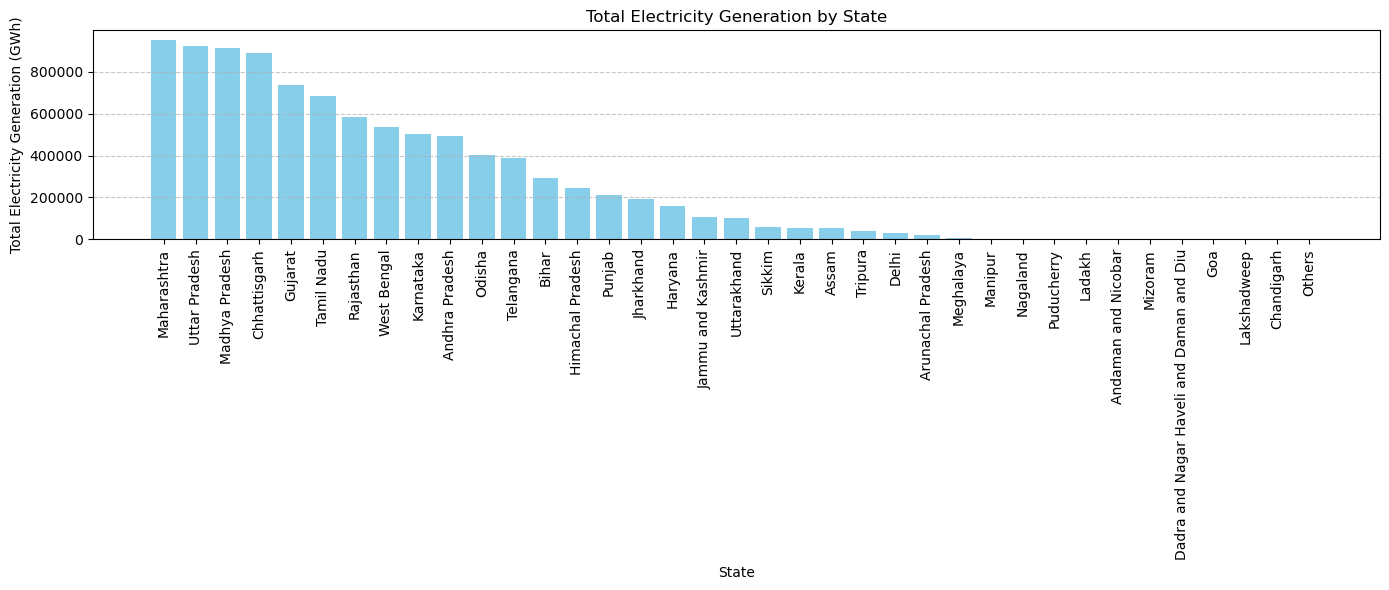

In [37]:
# Satewise electricity generation

generation_cols = [col for col in df_state.columns if 'elec_generation' in col]
statewise_sourcewise_gen = df_state.groupby('state')[generation_cols].sum()

statewise_sourcewise_gen['total'] = statewise_sourcewise_gen.sum(axis=1)


statewise_sourcewise_gen_sorted= statewise_sourcewise_gen.sort_values('total', ascending= False)

# Plot statewise electricity generation bar chart

plt.figure(figsize=(14, 6))
plt.bar(statewise_sourcewise_gen_sorted.index,statewise_sourcewise_gen_sorted['total'], color='skyblue')

#Labels & titles

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Electricity Generation (GWh)')
plt.title('Total Electricity Generation by State')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


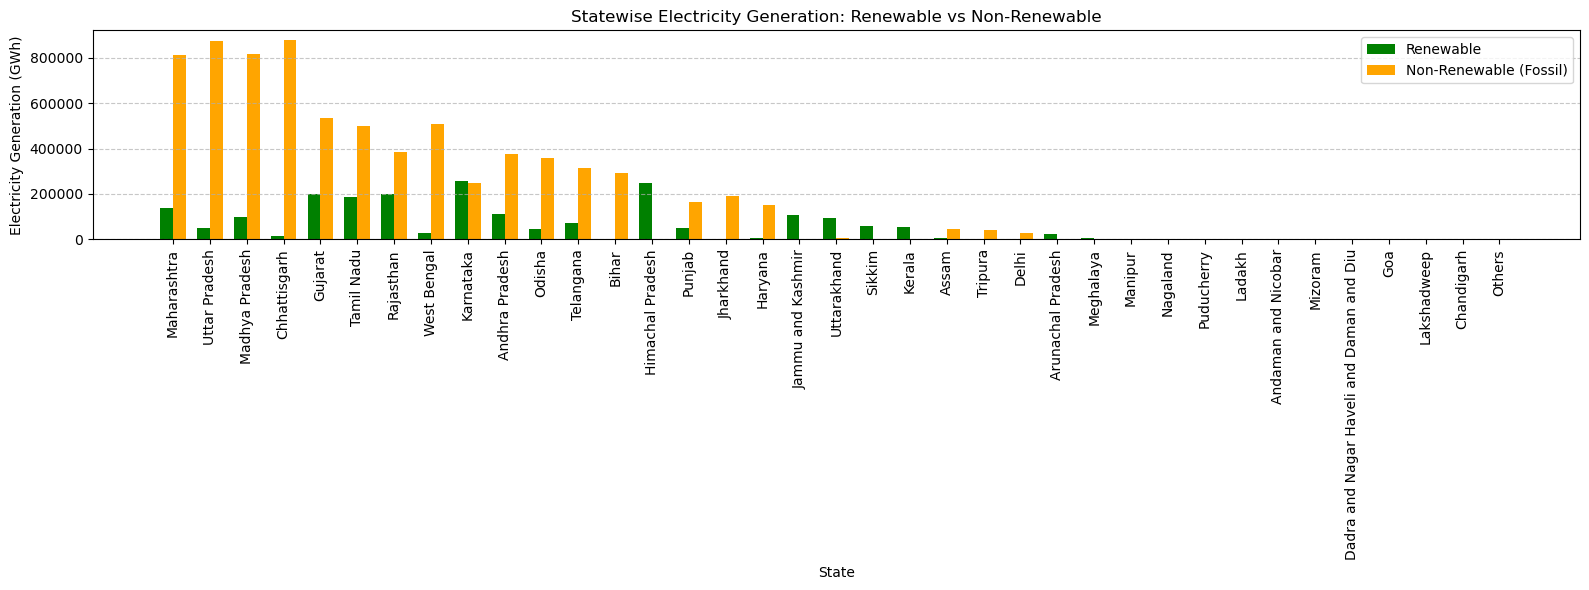

In [38]:
# Satewise electricity generation by renewable and non-renewable(or fossil) 

renewable_sources = [
    'elec_generation__bioenergy_gwh',
    'elec_generation__hydro_gwh',
    'elec_generation__solar_gwh',
    'elec_generation__wind_gwh',
    'elec_generation__other_renewables_gwh'
]

non_renewable_sources = [
    'elec_generation__coal_gwh',
    'elec_generation__gas_gwh',
    'elec_generation__nuclear_gwh',
    'elec_generation__other_fossil_gwh'
]

statewise_sourcewise_gen['renewable_generation'] = statewise_sourcewise_gen[renewable_sources].sum(axis=1)
statewise_sourcewise_gen['non_renewable_generation'] = statewise_sourcewise_gen[non_renewable_sources].sum(axis=1)


# Sort data

statewise_gen_sorted= statewise_sourcewise_gen[['renewable_generation', 'non_renewable_generation', 'total']].sort_values(
                                              by= 'total', ascending= False)



# Plot statewise electricity generation from renewables and non-renewable source

states = statewise_gen_sorted.index
x = np.arange(len(states))
width = 0.35  # bar width

# Plot
plt.figure(figsize=(16, 6))
plt.bar(x - width/2, statewise_gen_sorted['renewable_generation'], width, label='Renewable', color='green')
plt.bar(x + width/2, statewise_gen_sorted['non_renewable_generation'], width, label='Non-Renewable (Fossil)', color='orange')

# Labels and formatting
plt.xticks(x, states, rotation=90)
plt.xlabel('State')
plt.ylabel('Electricity Generation (GWh)')
plt.title('Statewise Electricity Generation: Renewable vs Non-Renewable')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle = '--', alpha=0.7)

plt.show()


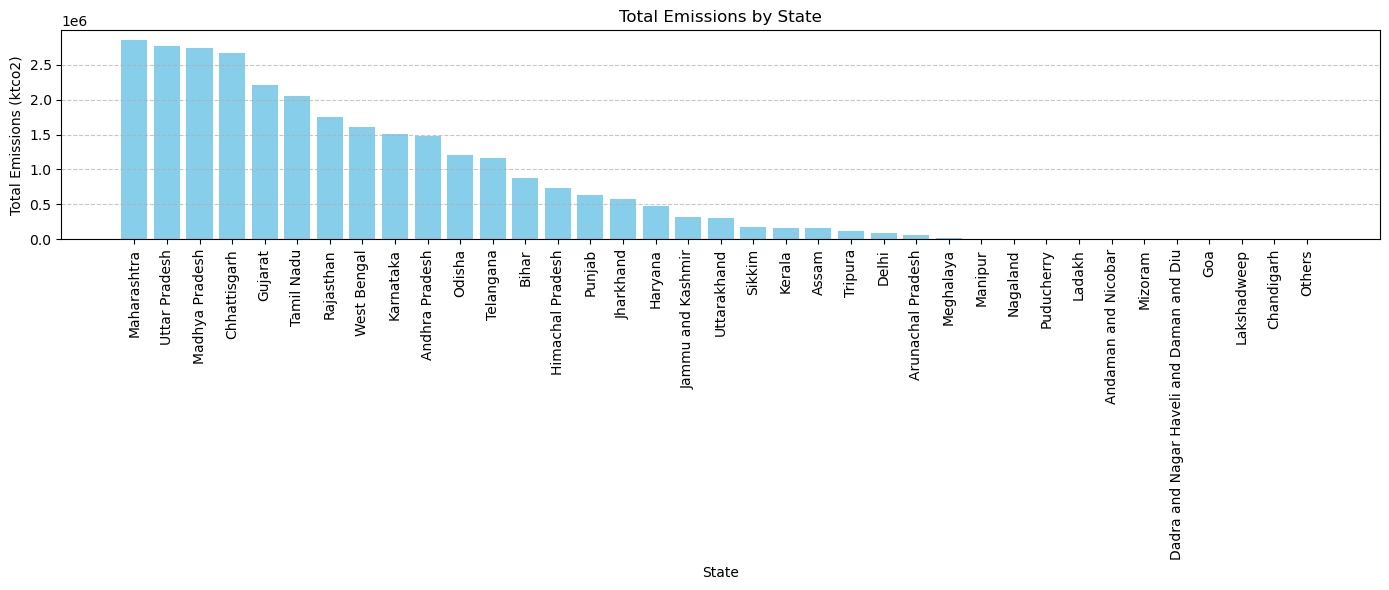

In [39]:
# State wise emissions

emissions_cols = [col for col in df_state.columns if 'emissions__' in col]

statewise_sourcewise_emissions = df_state.groupby('state')[emissions_cols].sum()

statewise_sourcewise_emissions['total'] = statewise_sourcewise_gen.sum(axis=1)


statewise_sourcewise_emission_sorted= statewise_sourcewise_emissions.sort_values('total', ascending= False)

# Plot statewise electricity generation bar chart

plt.figure(figsize=(14, 6))
plt.bar(statewise_sourcewise_emission_sorted.index,statewise_sourcewise_emission_sorted['total'], color='skyblue')

#Labels & titles

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Emissions (ktco2)')
plt.title('Total Emissions by State')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


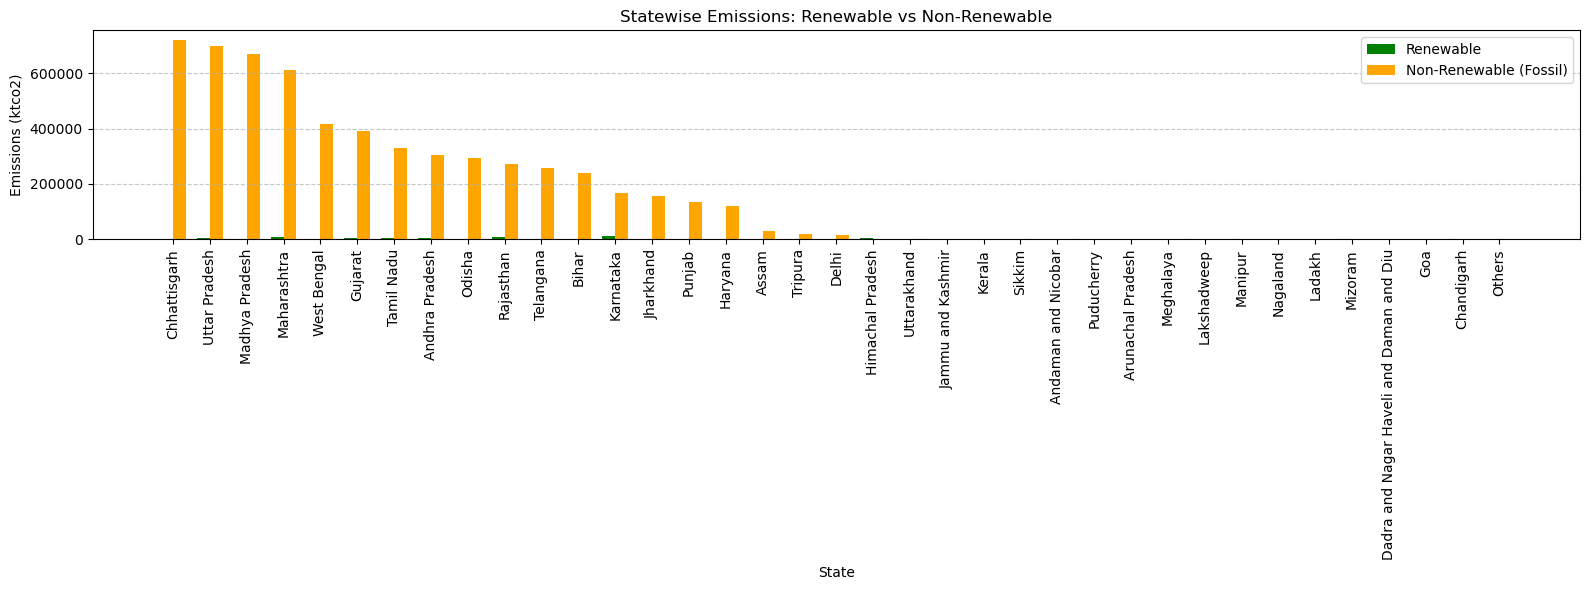

In [40]:
# Satewise emissions by renewable and non-renewable(or fossil) 

renewable_sources = ['emissions__bioenergy_ktco2', 'emissions__hydro_ktco2',
       'emissions__other_renewables_ktco2', 'emissions__solar_ktco2',
       'emissions__wind_ktco2']

non_renewable_sources = ['emissions__coal_ktco2',
       'emissions__gas_ktco2',
       'emissions__nuclear_ktco2', 'emissions__other_fossil_ktco2']

statewise_sourcewise_emissions['renewable_emission'] = statewise_sourcewise_emissions[renewable_sources].sum(axis=1)
statewise_sourcewise_emissions['non_renewable_emission'] = statewise_sourcewise_emissions[non_renewable_sources].sum(axis=1)
statewise_sourcewise_emissions['total_emission'] = statewise_sourcewise_emissions[emissions_cols].sum(axis=1)


# Sort data

statewise_emission_sorted= statewise_sourcewise_emissions[['renewable_emission', 'non_renewable_emission', 'total_emission']].sort_values(
                                              by= 'total_emission', ascending= False)



# Plot statewise electricity generation from renewables and non-renewable source

states = statewise_emission_sorted.index
x = np.arange(len(states))
width = 0.35  # bar width

# Plot
plt.figure(figsize=(16, 6))
plt.bar(x - width/2, statewise_emission_sorted['renewable_emission'], width, label='Renewable', color='green')
plt.bar(x + width/2, statewise_emission_sorted['non_renewable_emission'], width, label='Non-Renewable (Fossil)', color='orange')

# Labels and formatting
plt.xticks(x, states, rotation=90)
plt.xlabel('State')
plt.ylabel('Emissions (ktco2)')
plt.title('Statewise Emissions: Renewable vs Non-Renewable')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### India total Analysis

In [41]:
df_India_total= df_wide[df_wide['state']== "India Total"].copy()

#India total data

df_India_total['year'] = df_India_total['date'].dt.year
df_India_total['month'] = df_India_total['date'].dt.month
df_India_total['month_yr'] = df_India_total['date'].dt.strftime('%b-%Y') 

In [42]:

# India-level total generation yearwise

generation_cols = [col for col in df_state.columns if 'elec_generation' in col]

df_India_total['total_generation'] = df_India_total[generation_cols].sum(axis=1)

# India-level total emissions yearwise

emissions_cols = [col for col in df_state.columns if 'emissions__' in col]

df_India_total['total_emissions'] = df_India_total[emissions_cols].sum(axis=1)

# India level total generation from renewable and non-renewable sources yearwise

renewable_sources = [
    'elec_generation__bioenergy_gwh',
    'elec_generation__hydro_gwh',
    'elec_generation__solar_gwh',
    'elec_generation__wind_gwh',
    'elec_generation__other_renewables_gwh'
]

non_renewable_sources = [
    'elec_generation__coal_gwh',
    'elec_generation__gas_gwh',
    'elec_generation__nuclear_gwh',
    'elec_generation__other_fossil_gwh'
]

df_India_total['renewable_generation'] = df_India_total[renewable_sources].sum(axis=1)
df_India_total['non_renewable_generation'] = df_India_total[non_renewable_sources].sum(axis=1)



# India level total emissions from renewable and non-renewable sources yearwise

renewable_emissions_sources = ['emissions__bioenergy_ktco2', 'emissions__hydro_ktco2',
       'emissions__other_renewables_ktco2', 'emissions__solar_ktco2',
       'emissions__wind_ktco2']

non_renewable_emissions_sources = ['emissions__coal_ktco2',
       'emissions__gas_ktco2',
       'emissions__nuclear_ktco2', 'emissions__other_fossil_ktco2']

df_India_total['renewable_emission'] = df_India_total[renewable_sources].sum(axis=1)
df_India_total['non_renewable_emission'] = df_India_total[non_renewable_sources].sum(axis=1)


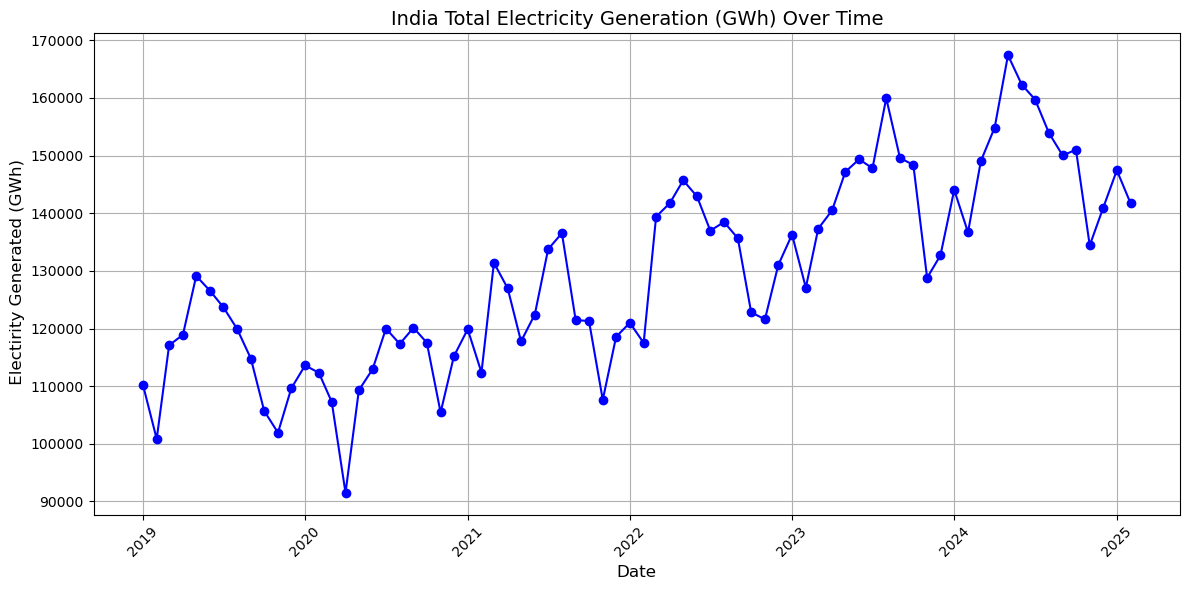

In [43]:
# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(df_India_total['date'], df_India_total['total_generation'], marker='o', color='blue')

# Formatting
plt.title('India Total Electricity Generation (GWh) Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel(' Electirity Generated (GWh)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

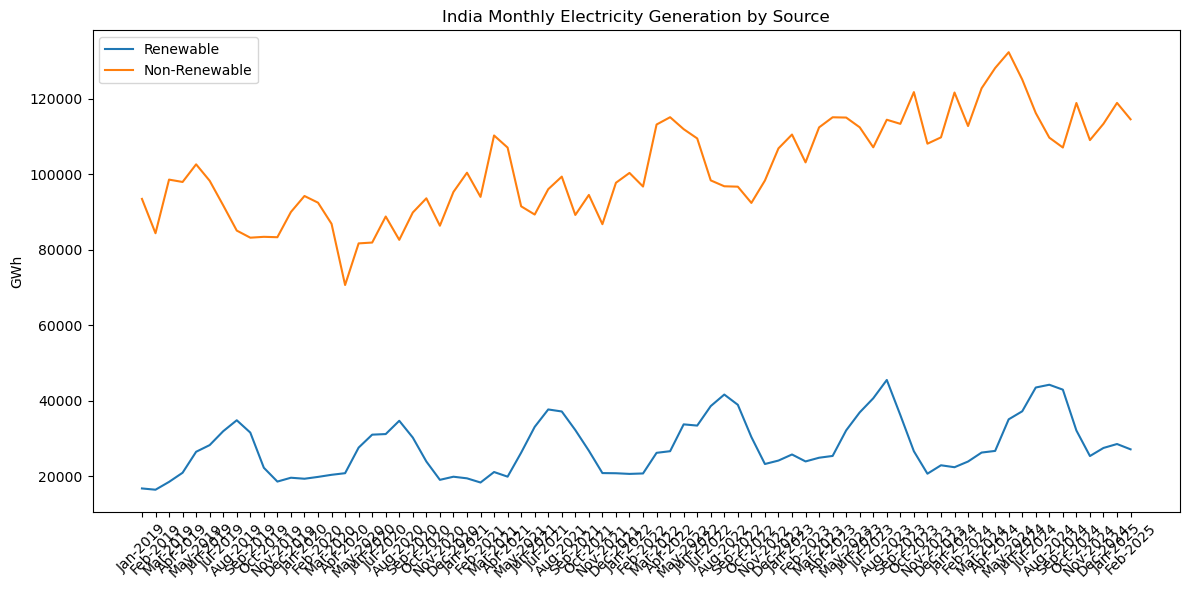

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_India_total['month_yr'], df_India_total['renewable_generation'], label='Renewable')
plt.plot(df_India_total['month_yr'], df_India_total['non_renewable_generation'], label='Non-Renewable')
plt.xticks(rotation=45)
plt.title('India Monthly Electricity Generation by Source')
plt.ylabel('GWh')
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
df_India_total['renewable_share'] = df_India_total['renewable_generation'] / df_India_total['total_generation'] * 100
df_India_total['renewable_emission_share'] = df_India_total['renewable_emission'] / df_India_total['total_emissions'] * 100


In [46]:
df_India_total['gen_yoy_change'] = df_India_total['total_generation'].pct_change(12) * 100
df_India_total['emission_yoy_change'] = df_India_total['total_emissions'].pct_change(12) * 100


<Axes: title={'center': 'YoY Average Monthly Emissions (2019–2025)'}, xlabel='month'>

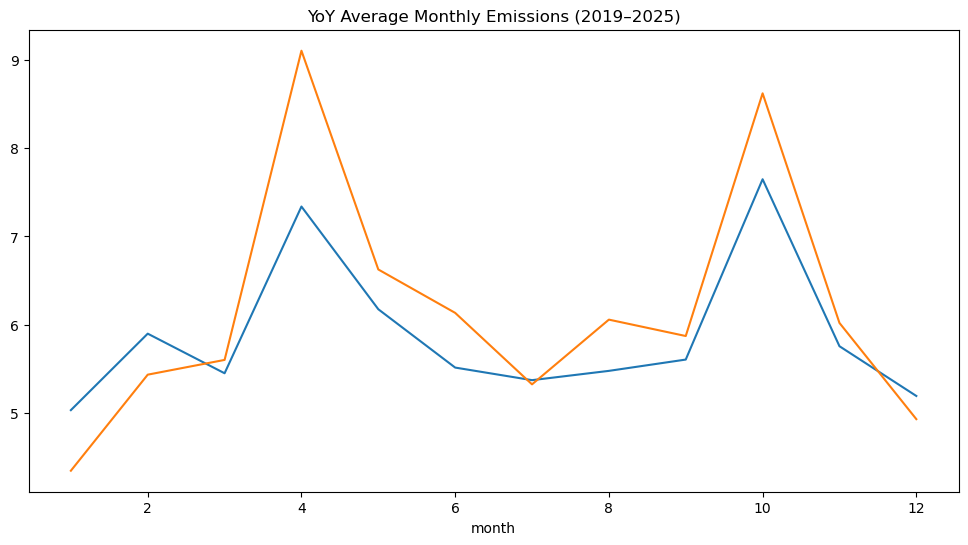

In [47]:
gen = df_India_total.groupby('month')['gen_yoy_change'].mean()
emi = df_India_total.groupby('month')['emission_yoy_change'].mean()

gen.plot(kind='line', figsize=(12,6), title='YoY Average Monthly Generation (2019–2025)')
emi.plot(kind='line', figsize=(12,6), title='YoY Average Monthly Emissions (2019–2025)')


<Axes: title={'center': 'India Average Monthly Generation (2019–2025)'}, xlabel='month'>

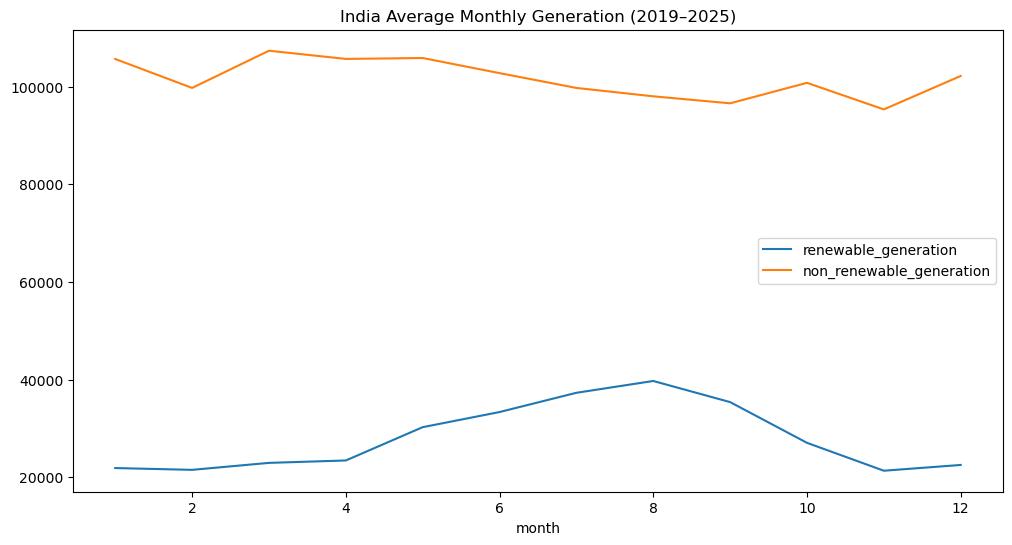

In [48]:
seasonality = df_India_total.groupby('month')[['renewable_generation', 'non_renewable_generation']].mean()
seasonality.plot(kind='line', figsize=(12,6), title='India Average Monthly Generation (2019–2025)')


In [49]:
corr= df_India_total[['renewable_generation', 'total_emissions']].corr()
corr

,renewable_generation,total_emissions
renewable_generation,1.000000,0.246882
total_emissions,0.246882,1.000000


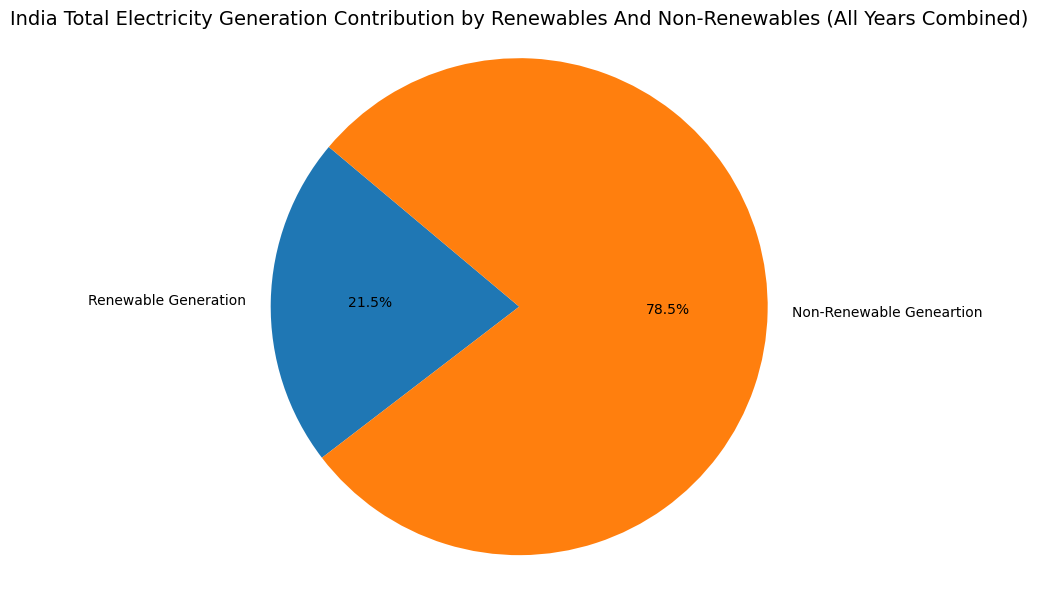

In [50]:
total_gen_by_source = df_India_total[['renewable_generation', 'non_renewable_generation']].sum()
labels= ['Renewable Generation', 'Non-Renewable Geneartion']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_gen_by_source,labels= labels, autopct='%1.1f%%', startangle=140)
plt.title('India Total Electricity Generation Contribution by Renewables And Non-Renewables (All Years Combined)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()


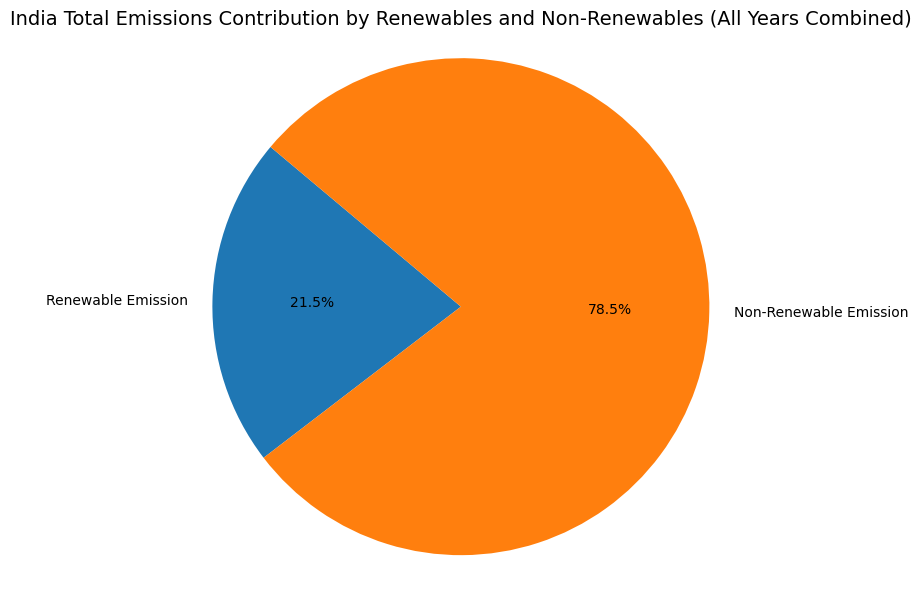

In [51]:
total_em_by_source = df_India_total[['renewable_emission', 'non_renewable_emission']].sum()
labels= ['Renewable Emission', 'Non-Renewable Emission']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_em_by_source,labels= labels, autopct='%1.1f%%', startangle=140)
plt.title('India Total Emissions Contribution by Renewables and Non-Renewables (All Years Combined)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()


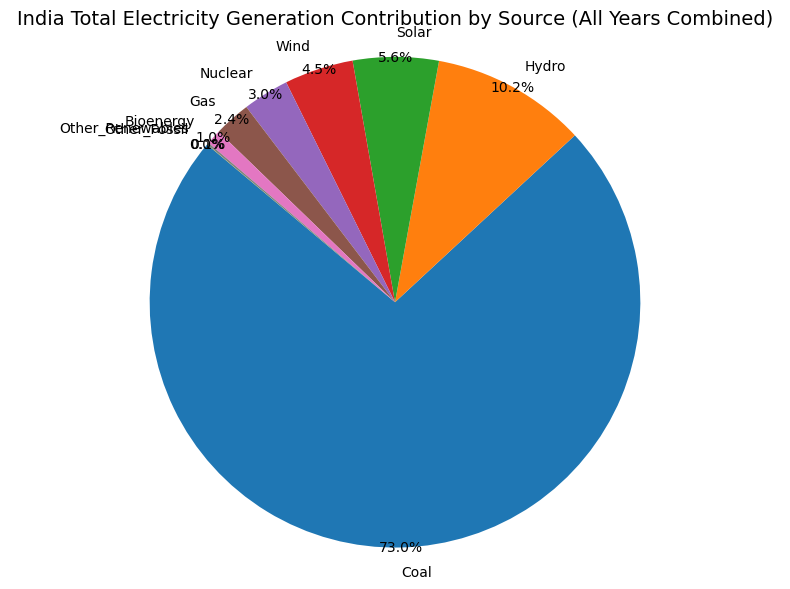

In [52]:
total_gen_by_source = df_India_total[generation_cols].sum().sort_values(ascending=False)

labels = [col.replace('elec_generation__', '').replace('_gwh', '').replace('__', ' ').title()
          for col in total_gen_by_source.index]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_gen_by_source, labels=labels, autopct='%1.1f%%', startangle=140,pctdistance=1.0,labeldistance=1.1 )
plt.title('India Total Electricity Generation Contribution by Source (All Years Combined)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()


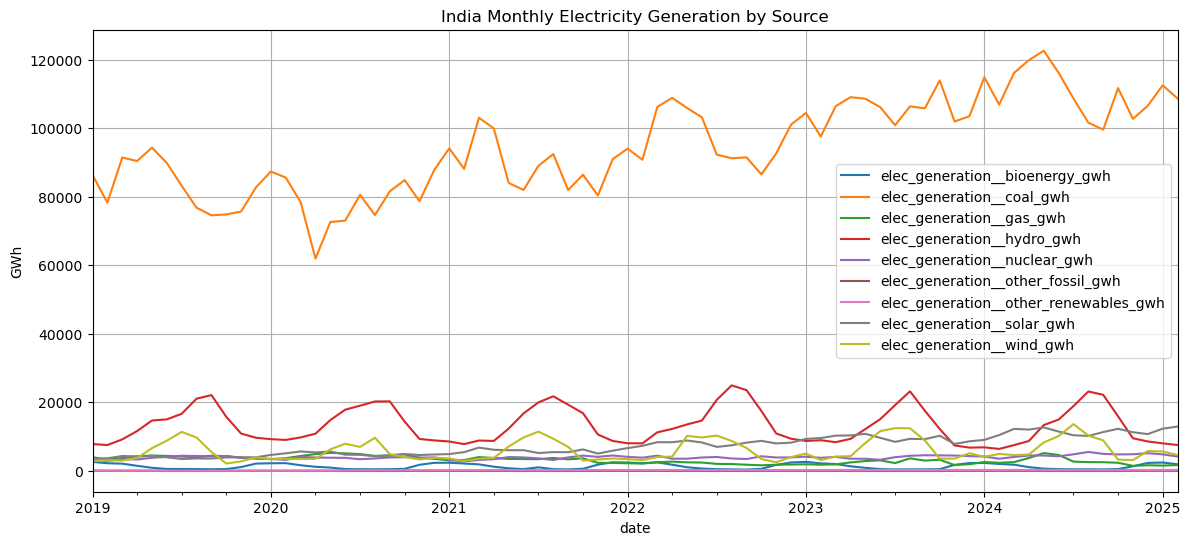

In [69]:
# Monthly Electricity Generation by Source

generation_cols = [col for col in df_India_total.columns if 'elec_generation' in col]

monthly_gen = df_India_total.groupby('date')[generation_cols].sum()

monthly_gen.plot(figsize=(14,6), title='India Monthly Electricity Generation by Source')
plt.ylabel('GWh')
plt.grid(True)
plt.show()


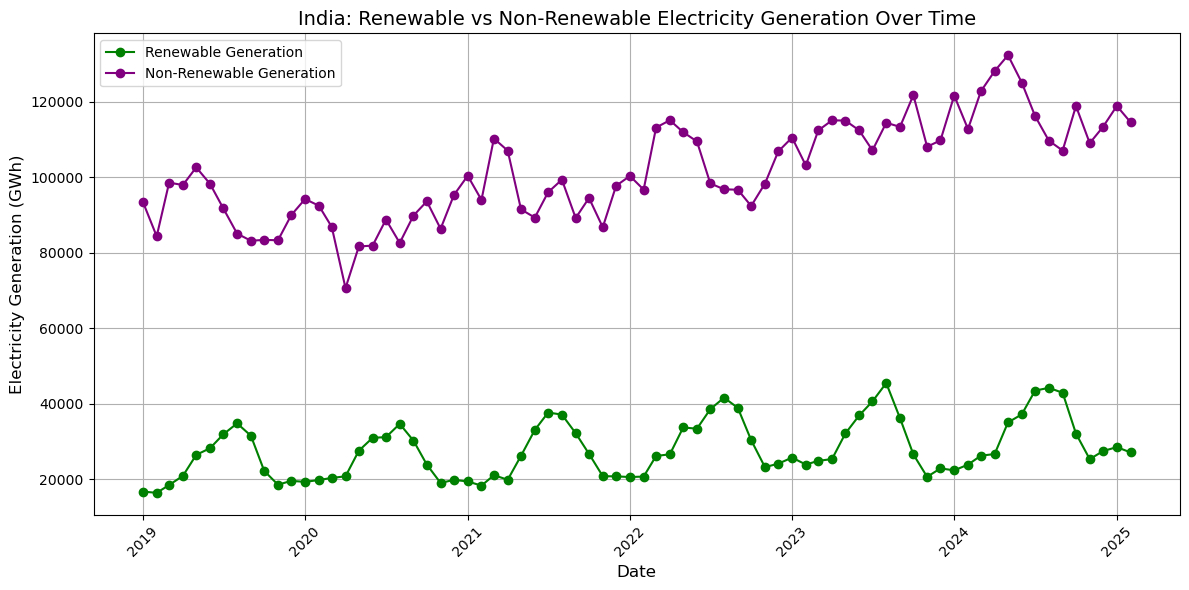

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Line for Renewable Generation
plt.plot(df_India_total['date'], df_India_total['renewable_generation'], marker='o', color='green', label='Renewable Generation')

# Line for Non-Renewable Generation
plt.plot(df_India_total['date'], df_India_total['non_renewable_generation'], marker='o', color='purple', label='Non-Renewable Generation')

# Formatting
plt.title('India: Renewable vs Non-Renewable Electricity Generation Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Electricity Generation (GWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


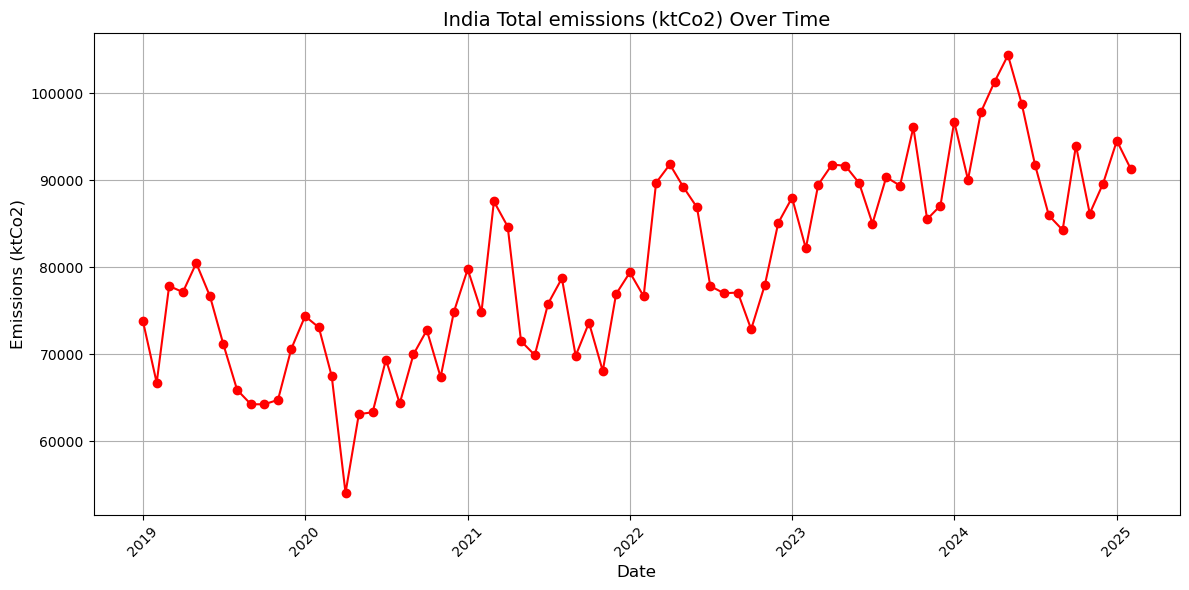

In [71]:
# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(df_India_total['date'], df_India_total['total_emissions'], marker='o', color='red')

# Formatting
plt.title('India Total emissions (ktCo2) Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Emissions (ktCo2)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

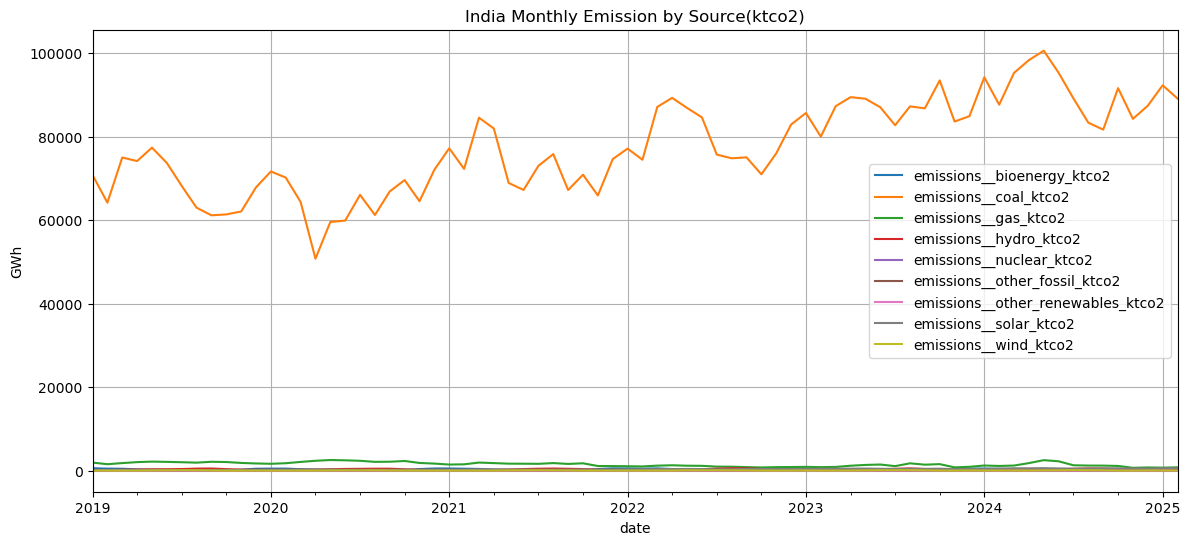

In [72]:
# Monthly Electricity Generation by Source


monthly_emission = df_India_total.groupby('date')[emissions_cols].sum()

monthly_emission.plot(figsize=(14,6), title='India Monthly Emission by Source(ktco2)')
plt.ylabel('GWh')
plt.grid(True)
plt.show()


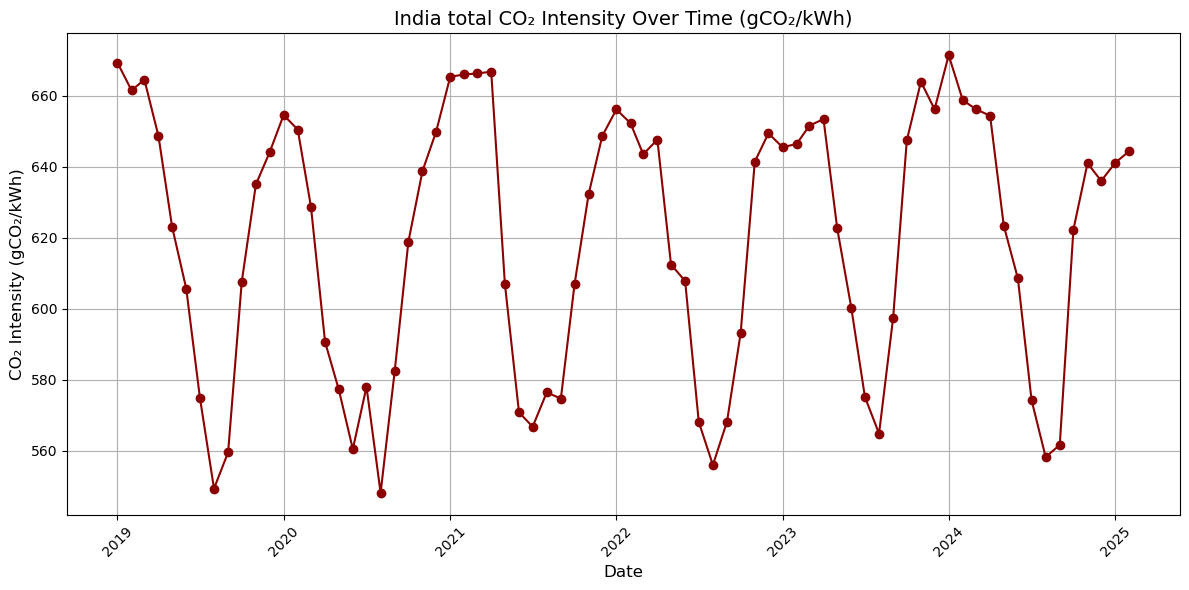

In [73]:
# Plot line chart

plt.figure(figsize=(12, 6))
plt.plot(df_India_total['date'], df_India_total['emissions_co2_intensity_co2_intensity_gco2/kwh'], marker='o', color='darkred')


# Formatting
plt.title('India total CO₂ Intensity Over Time (gCO₂/kWh)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CO₂ Intensity (gCO₂/kWh)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time Series Analysis


In [75]:
df_wide['total_emissions(ktco2)'] = df_wide[emissions_cols].sum(axis=1)

In [79]:
emissions= df_wide[['date', 'total_emissions(ktco2)']].groupby('date')['total_emissions(ktco2)'].sum().reset_index()


In [80]:
emissions.shape

(74, 2)

In [81]:
emissions['year'] = emissions['date'].dt.year
emissions['month'] = emissions['date'].dt.month
emissions['month_yr'] = emissions['date'].dt.strftime('%b-%Y')


In [82]:
emissions.set_index(emissions.date, inplace=True)

In [83]:
emissions.drop(columns= ['date'], inplace= True)

In [84]:
ts = emissions['total_emissions(ktco2)']

<Axes: xlabel='date'>

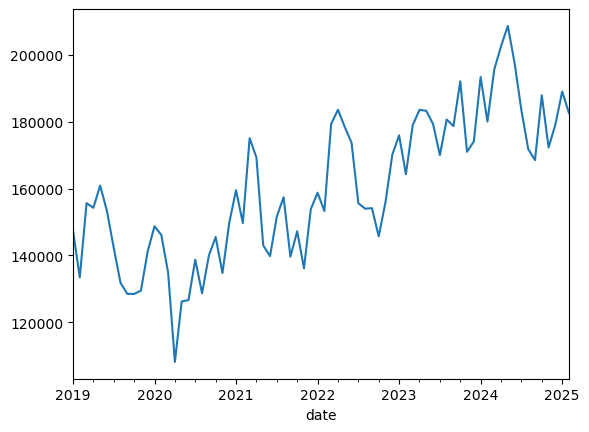

In [85]:
ts.plot()

In [86]:
pd.pivot_table(data = emissions, index = 'year', columns = 'month', values = 'total_emissions(ktco2)')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2019,147598.28,133405.26,155654.79,154255.55,160915.19,153291.96,142261.33,131772.28,128463.75,128451.88,129463.97,141214.79
2020,148722.18,146125.48,134890.42,108089.94,126199.08,126607.98,138728.94,128637.35,139946.33,145500.65,134709.14,149741.07
2021,159524.46,149672.39,175111.12,169323.92,142986.55,139771.55,151613.38,157423.11,139615.60,147228.42,136110.68,153823.29
2022,158779.32,153288.60,179401.76,183624.64,178476.82,173743.02,155630.34,153982.48,154159.69,145697.69,155989.58,170175.19
2023,175962.43,164309.84,178970.19,183592.65,183303.53,179325.57,170016.43,180697.19,178738.79,192144.01,171016.78,174147.44
2024,193440.26,180087.26,195629.60,202660.73,208734.03,197538.50,183467.04,171877.72,168528.84,187957.53,172321.91,179209.16
2025,189065.10,182645.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='year'>

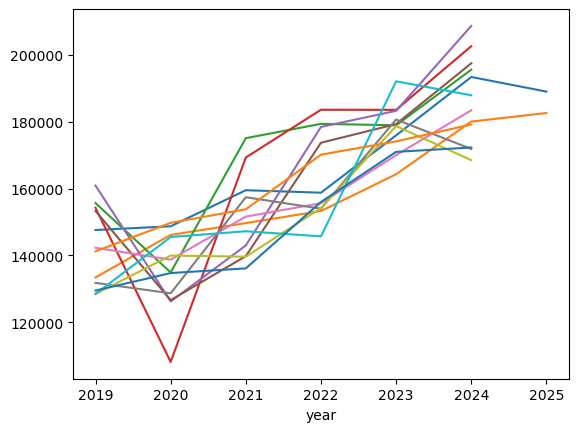

In [87]:
#Long to wide data - Trend
pd.pivot_table(data = emissions, index = 'year', columns = 'month', values = 'total_emissions(ktco2)').plot(legend=False)

<Axes: xlabel='month'>

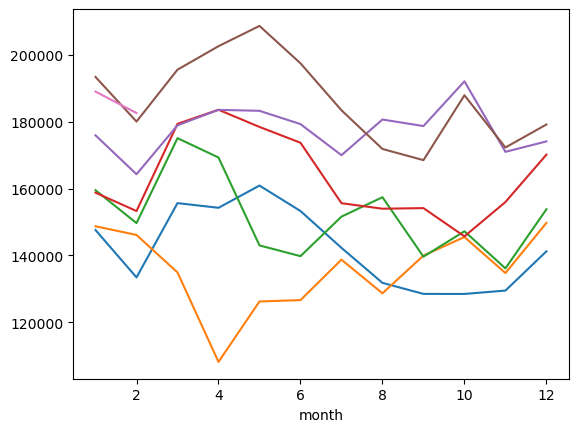

In [88]:
# Seasonaility
pd.pivot_table(data = emissions, index = 'month', columns = 'year', values = 'total_emissions(ktco2)').plot(legend=False)

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose # decomposition

In [90]:
decom = seasonal_decompose(ts, model='multiplicative')
#decom = seasonal_decompose(ts, model='additive')

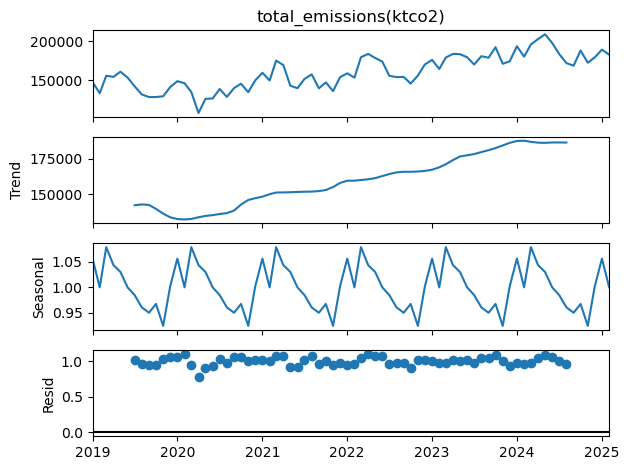

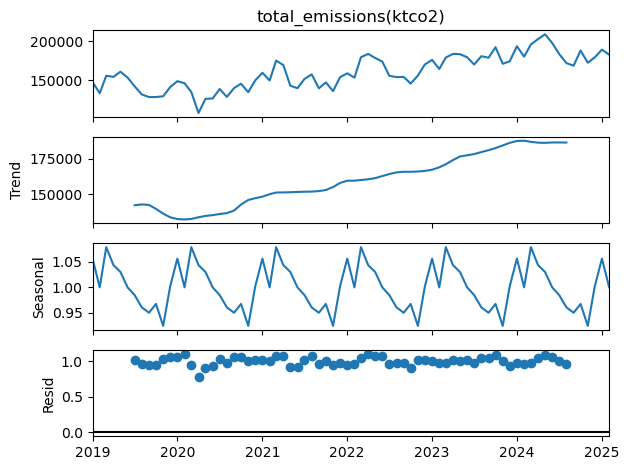

In [91]:
decom.plot()

In [92]:
pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1).head(12)

,total_emissions(ktco2),trend,seasonal,resid
date,,,,
2019-01-01,147598.28,NaN,1.056517,NaN
2019-02-01,133405.26,NaN,1.000106,NaN
2019-03-01,155654.79,NaN,1.078973,NaN
2019-04-01,154255.55,NaN,1.043788,NaN
2019-05-01,160915.19,NaN,1.030378,NaN
2019-06-01,153291.96,NaN,1.000031,NaN
2019-07-01,142261.33,142275.915000,0.984993,1.015132
2019-08-01,131772.28,142852.753333,0.960849,0.960020
2019-09-01,128463.75,142517.580417,0.950287,0.948544


In [93]:
from statsmodels.tsa.stattools import acf, pacf_ols # Autocorrelations and Partial autocorrelation

In [94]:
acf(ts)

array([1.        , 0.83593357, 0.72067996, 0.64935982, 0.58166994,
       0.55389775, 0.53456391, 0.55337954, 0.54343612, 0.53632113,
       0.46096991, 0.4036326 , 0.44517855, 0.428981  , 0.39411814,
       0.32477638, 0.24553973, 0.19240492, 0.12470039])

In [95]:
pacf_ols(ts)

array([ 1.        ,  0.84844762,  0.11869451,  0.08300012,  0.00297488,
        0.15882079,  0.05152331,  0.22338685,  0.05010105,  0.17641213,
       -0.16591443,  0.08124302,  0.39547466,  0.0264573 , -0.00580613,
       -0.23460537, -0.09441942,  0.08403098, -0.03942573])

In [96]:
import statsmodels.tsa.api as smt

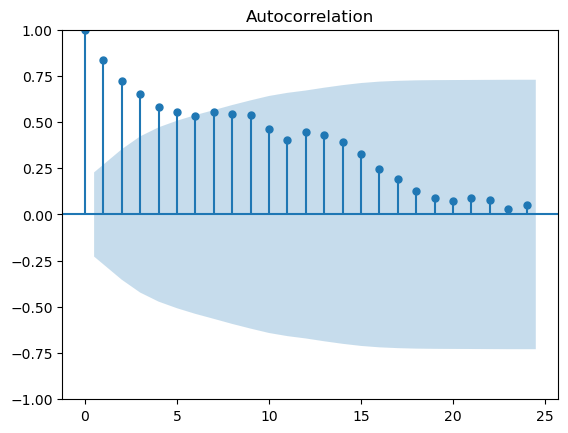

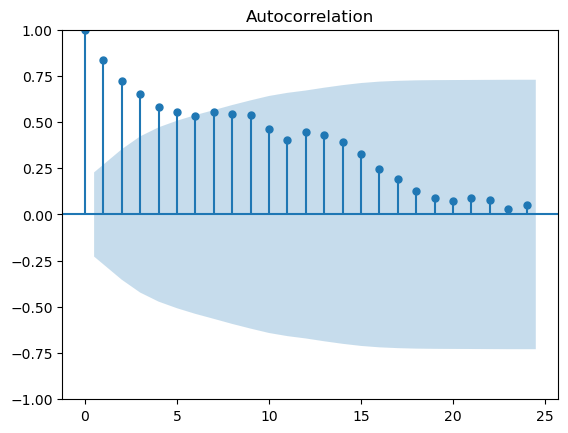

In [97]:
smt.graphics.plot_acf(ts, lags=24)

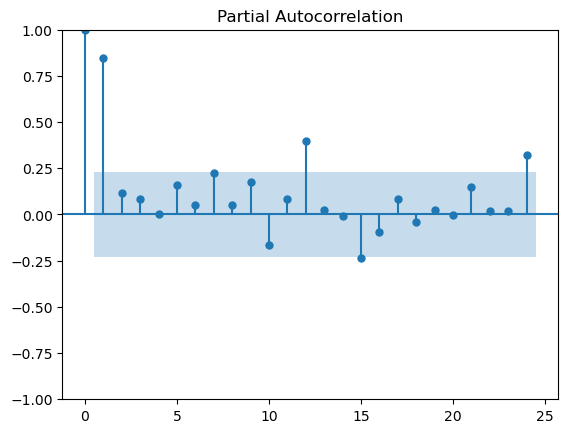

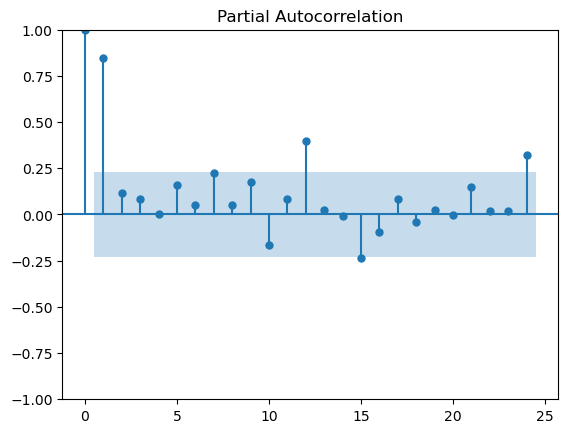

In [98]:
smt.graphics.plot_pacf(ts, lags = 24, method='ols')

#### Check Stationarity- Adfuller test

In [99]:
# Perform Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller
adfuller(ts)   #p-value: 0.15014 (>0.05),since p-value is high, the series(ts) is not stationary

(-2.370808184768587,
 0.1501456327132326,
 0,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 1321.954270038133)

In [100]:
ts_ln = np.log(ts)

In [101]:
adfuller(ts_ln) #p-value=0.1316618075656626 (>0.05), since p-value is high, the series(ts_ln_diff) is not stationary

(-2.436636591380344,
 0.1316618075656626,
 0,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 -136.7683644150381)

In [102]:
ts_diff = ts.diff().dropna()

In [103]:
adfuller(ts_diff) #p-value=0.00014334353423692473, since p-value<0.05, the series (ts_diff) is stationary series

(-4.575408547056192,
 0.00014334353423692473,
 10,
 62,
 {'1%': -3.540522678829176,
  '5%': -2.9094272025108254,
  '10%': -2.5923136524453696},
 1300.9746384733194)

#### Moving average - trend


<Axes: xlabel='date'>

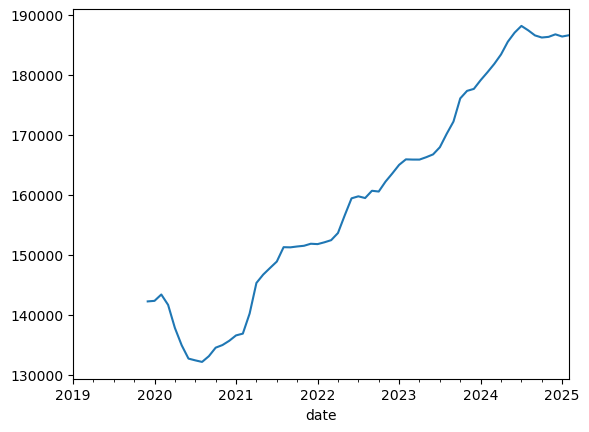

In [104]:

ts.rolling(window=12).mean().plot()

<Axes: xlabel='date'>

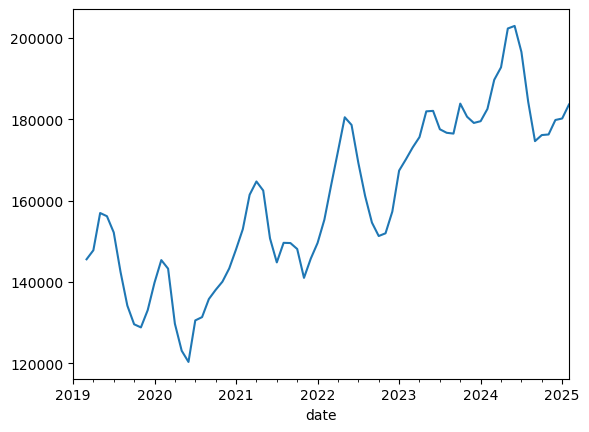

In [105]:
ts.rolling(window=3).mean().plot()

<Axes: xlabel='date'>

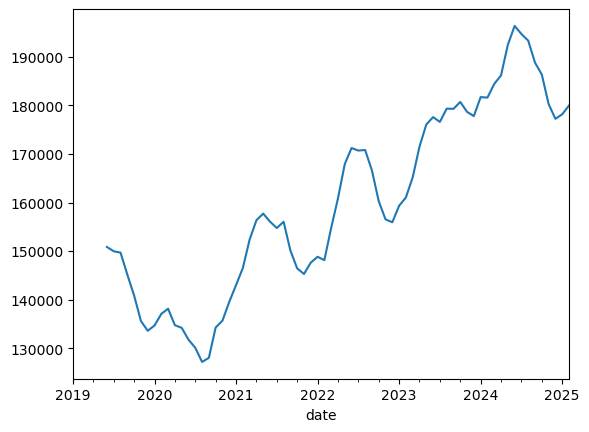

In [106]:
ts.rolling(window=6).mean().plot()

<Axes: xlabel='date'>

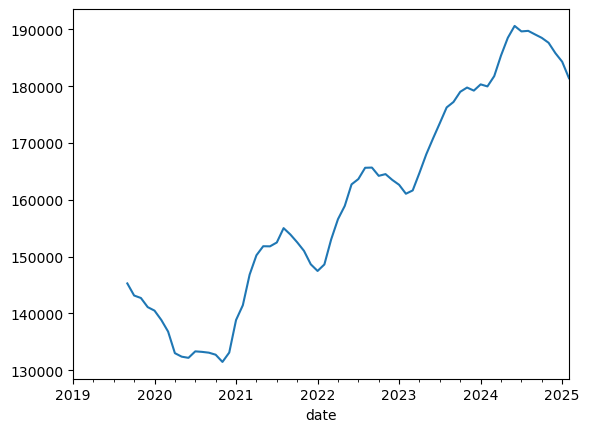

In [107]:
ts.rolling(window=9).mean().plot()

## Time Series Forecasting- ETS Model (Forecasting Emissions for next 12 months)

In [108]:
#ETS models
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [109]:
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [110]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [111]:
auto_hwm(ts, val_split_date ='2024-06-01' , alpha=alpha, beta=beta, gamma=gamma, 
              trend='mul', seasonal='mul', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 729 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.8}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.1}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.1}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.2}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.2}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.2}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.5}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.6}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.6}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.7}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.7}
Checking f

C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.4}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.4}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.7}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.4}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.8}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.1}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.2}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.4}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.6}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.7}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.1}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.4}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.7}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.1}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.5}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.8}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.2}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.8}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.2}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.5}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.5}
Checking f

C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.5}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.5}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.7}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.3}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.7}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.7}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.4}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.1}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.2}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.7}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.5}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.1}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.4}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-

Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.3}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.9}


C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

{'alpha': 0.6, 'beta': 0.1, 'gamma': 0.2, 'mae': array(0.01810494)}

In [112]:
ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)

C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [113]:
print(ets_model.summary())

                        ExponentialSmoothing Model Results                        
Dep. Variable:     total_emissions(ktco2)   No. Observations:                   74
Model:               ExponentialSmoothing   SSE                    16291704693.509
Optimized:                           True   AIC                           1453.529
Trend:                     Multiplicative   BIC                           1490.394
Seasonal:                  Multiplicative   AICC                          1465.966
Seasonal Periods:                      12   Date:                 Thu, 24 Jul 2025
Box-Cox:                            False   Time:                         10:38:51
Box-Cox Coeff.:                      None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothi

In [114]:
train = ts['2019-01-01':'2024-06-01']  # Model on the train data
test = ts['2024-07-01':]

In [115]:
ets_model1 = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)

C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [116]:
f_cast = ets_model1.forecast(8)


#### Calculate Absolute Square Percentage Error (MAPE) (test error)

In [117]:
print('test error', np.mean(np.abs(test - f_cast)/test))

test error 0.07202832239763951


#### Calculate RMSE & RMPSE (test error)

In [118]:
# Calculate RMSE- Root Mean Square Error

from sklearn.metrics import mean_squared_error


rmse = np.sqrt(mean_squared_error(test, f_cast))

print(f"RMSE: {rmse}")

#Calculate RMSPE- Root Mean Sqaure Percentage Error

def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

rmspe= rmspe(test,f_cast)
print(f"RMSPE: {rmspe}")


RMSE: 16640.653320432983
RMSPE: 9.103341262166225


#### Calculate Mean Absolute Percentage Error (MAPE) (train error)

In [119]:
pred = ets_model1.fittedvalues['2023-02-01':]

In [120]:
actual = train['2023-02-01':'2024-06-01']

In [121]:
print('train error',np.mean(np.abs(actual-pred)/actual))

train error 0.14938703386726518


#### Forecast for next 12 months

In [122]:
ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)

C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [123]:
f_cast_next12= ets_model.forecast(12)

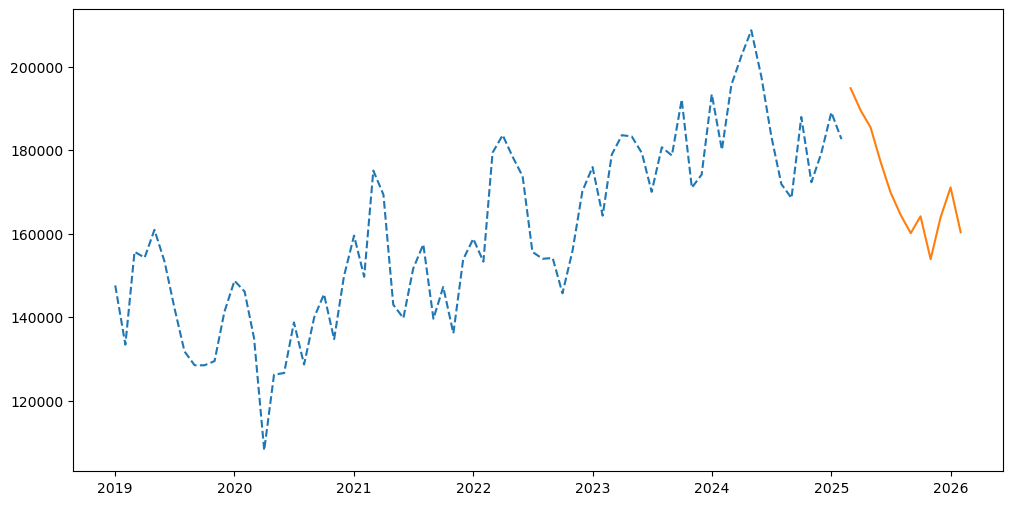

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ts, '--', label='obs')
plt.plot(f_cast_next12, '-', label=f_cast_next12)

## Time Series Forecasting- SARIMAX Model (Forecasting Emissions for next 12 months)

In [125]:
ts_diff = ts.diff().dropna()   #Stationary series

ln_ts = np.log(ts)  #input to model

In [126]:
adfuller(ts_diff)

(-4.575408547056192,
 0.00014334353423692473,
 10,
 62,
 {'1%': -3.540522678829176,
  '5%': -2.9094272025108254,
  '10%': -2.5923136524453696},
 1300.9746384733194)

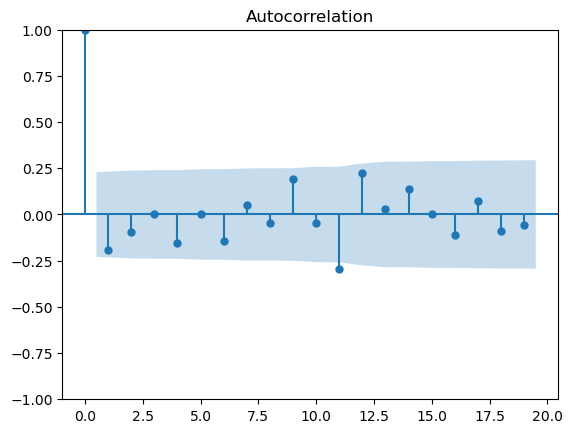

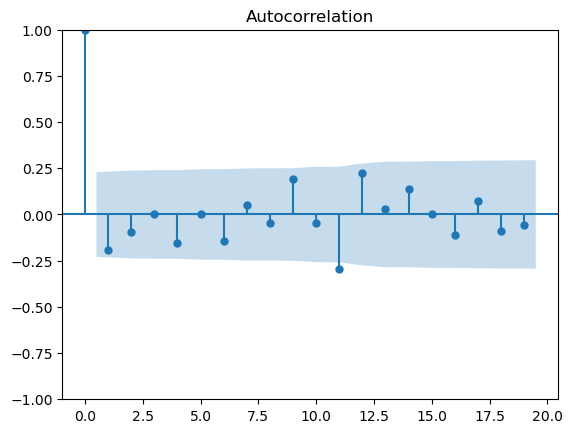

In [127]:
smt.graphics.plot_acf(ts_diff) 


In [128]:
smt.acf(ts_diff)

array([ 1.00000000e+00, -1.91188410e-01, -9.62221660e-02,  1.09671787e-04,
       -1.55480308e-01,  3.43773781e-03, -1.45339047e-01,  5.38943771e-02,
       -4.59006279e-02,  1.93884332e-01, -4.79687711e-02, -2.94401854e-01,
        2.27040420e-01,  2.69970288e-02,  1.36658074e-01,  3.38889677e-03,
       -1.10515315e-01,  7.30827777e-02, -9.14565992e-02])

In [129]:
# Series is seasonal - SARIMA Model
# value of q = 1, Q=1
# q value foudnd based after which value of lag, the correlations becoming zero or crossing zero (positive to negative or negative to positive)

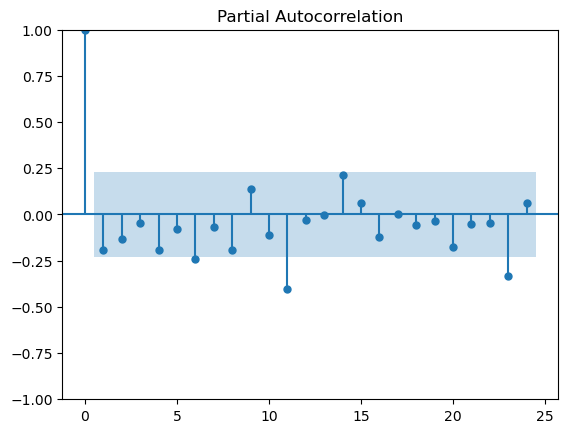

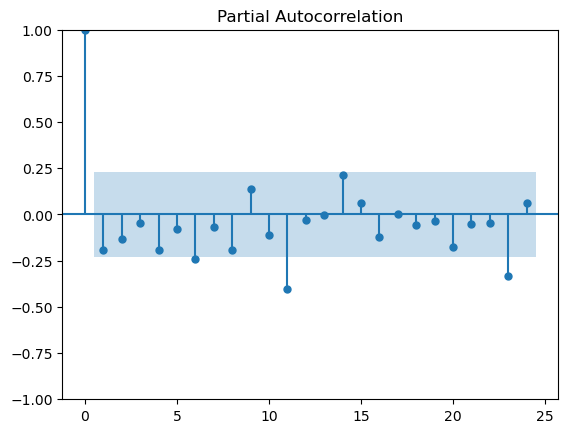

In [130]:
#PACF
smt.graphics.plot_pacf(ts_diff, lags = 24, method='ols')

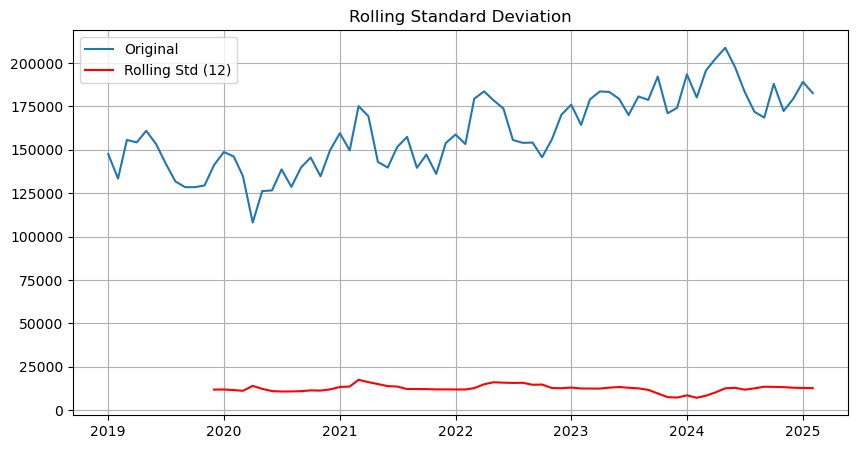

In [131]:
rolling_std = ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(ts, label='Original')
plt.plot(rolling_std, label='Rolling Std (12)', color='red')
plt.legend()
plt.title("Rolling Standard Deviation")
plt.grid(True)
plt.show()


In [132]:
train = ln_ts[:'2024-06-01']  # Model on the train data
test = ln_ts['2024-07-01':]

In [133]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [134]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:             total_emissions(ktco2)   No. Observations:                   66
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  60.472
Date:                            Thu, 24 Jul 2025   AIC                           -110.944
Time:                                    10:39:07   BIC                           -101.285
Sample:                                01-01-2019   HQIC                          -107.253
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5774      0.167      3.459      0.001       0.250       0.905
ma.L1         -0.8421      0.175   

In [135]:
act = np.exp(test)


In [136]:
f_cast= np.exp(model.forecast(8))


#### Calculate MAPE- Mean Absolute Percentage Error (test error)


In [137]:

print('test_error:',np.mean(np.abs(act-f_cast)/act))

test_error: 0.07631322404102872


#### Calculate RMSE & RMSPE (test error) 


In [138]:
# Calculate RMSE- Root Mean Square Error

from sklearn.metrics import mean_squared_error


rmse = np.sqrt(mean_squared_error(act, f_cast))

print(f"RMSE: {rmse}")

#Calculate RMSPE- Root Mean Sqaure Percentage Error

def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

rmspe= rmspe(act,f_cast)
print(f"RMSPE: {rmspe}")


RMSE: 14617.199489134122
RMSPE: 8.38045013266231


1. RMSE(Root Mean Square Error)(~14,617): This tells the average absolute error magnitude in the original unit data (Ktco2).

Interpretation:
On average,  model's forecasts deviate by ~14,617 units from the actual values.

2. RMSPE (Root Mean Squared Percentage Error)(8.38%):Measures percentage-based error, giving more scale-invariant insight.

Interpretation:
Model’s predictions deviate from actuals by about 8.38% on average (in a root-mean-square sense).


#### Calculate MAPE- Mean Absolute Percentage Error (train error)


In [139]:
train_act= np.exp(train['2023-06-01':'2024-06-01'])


In [140]:
train_pred= np.exp(model.fittedvalues['2023-06-01':'2024-06-01'])

In [141]:
#Calculate MAPE- Mean Absolute Percentage Error for train data

print('train_error_last1year:', np.mean(np.abs(train_act-train_pred)/train_act))

train_error_last1year: 0.04757370853144472


#### Forecast for next 12 months

In [142]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ln_ts, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [143]:
f_cast_next12 = np.exp(model.forecast(12))
f_cast_next12

2025-03-01    190942.951654
2025-04-01    187062.963251
2025-05-01    189207.864108
2025-06-01    187833.550323
2025-07-01    188071.657623
2025-08-01    185549.954276
2025-09-01    184921.416035
2025-10-01    186277.383830
2025-11-01    184013.284268
2025-12-01    191244.207895
2026-01-01    195269.292379
2026-02-01    192160.840340
Freq: MS, Name: predicted_mean, dtype: float64

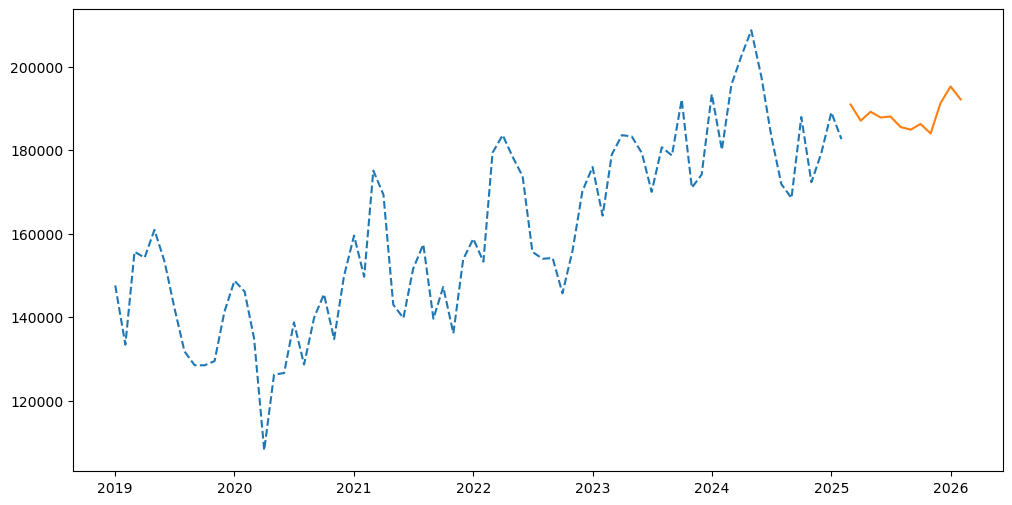

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ts, '--', label='obs')
plt.plot(f_cast_next12, '-', label=f_cast_next12)

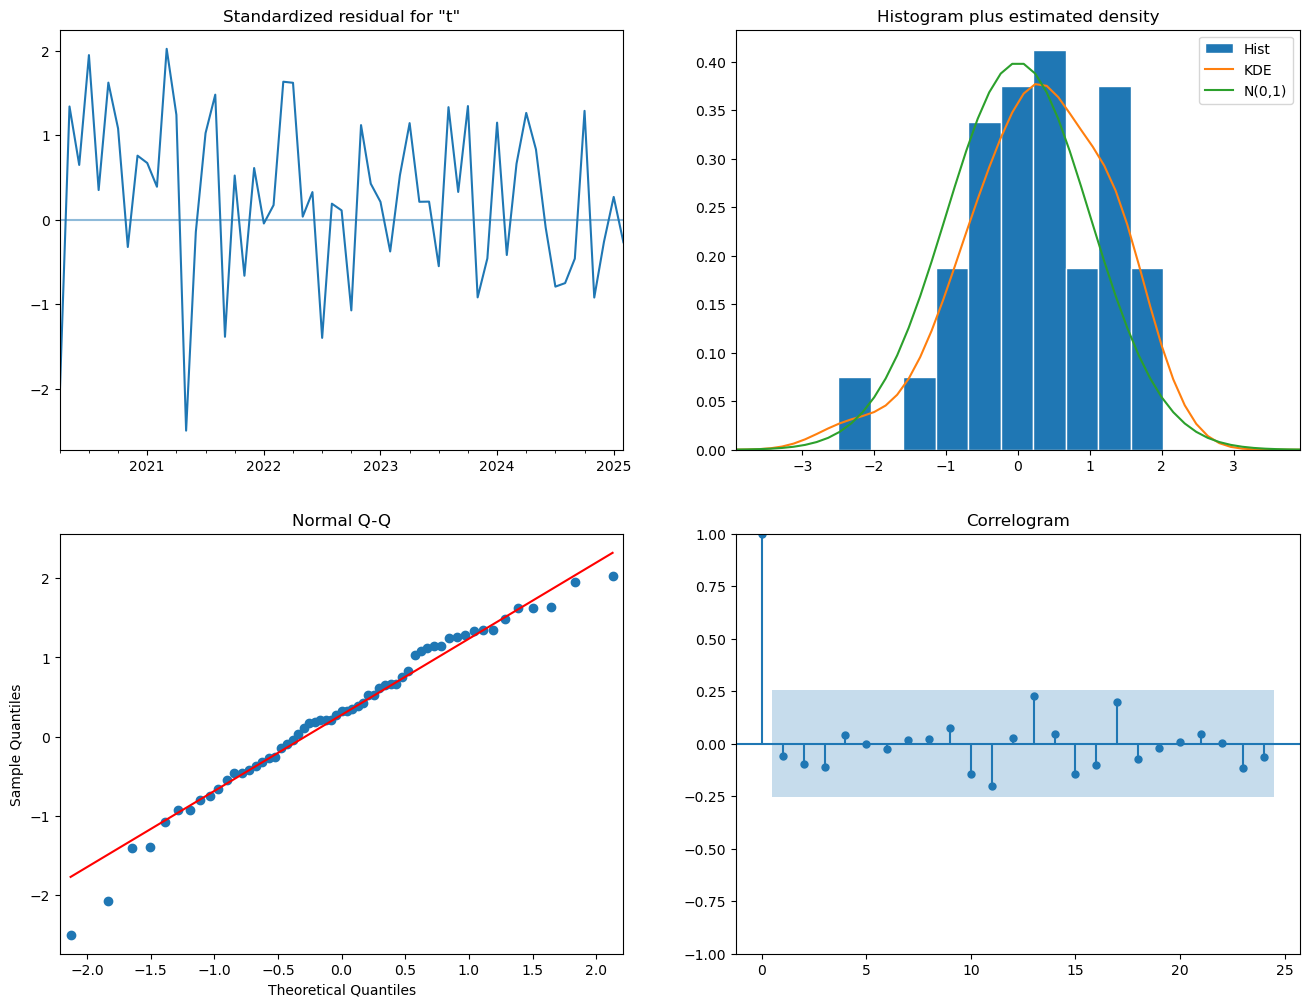

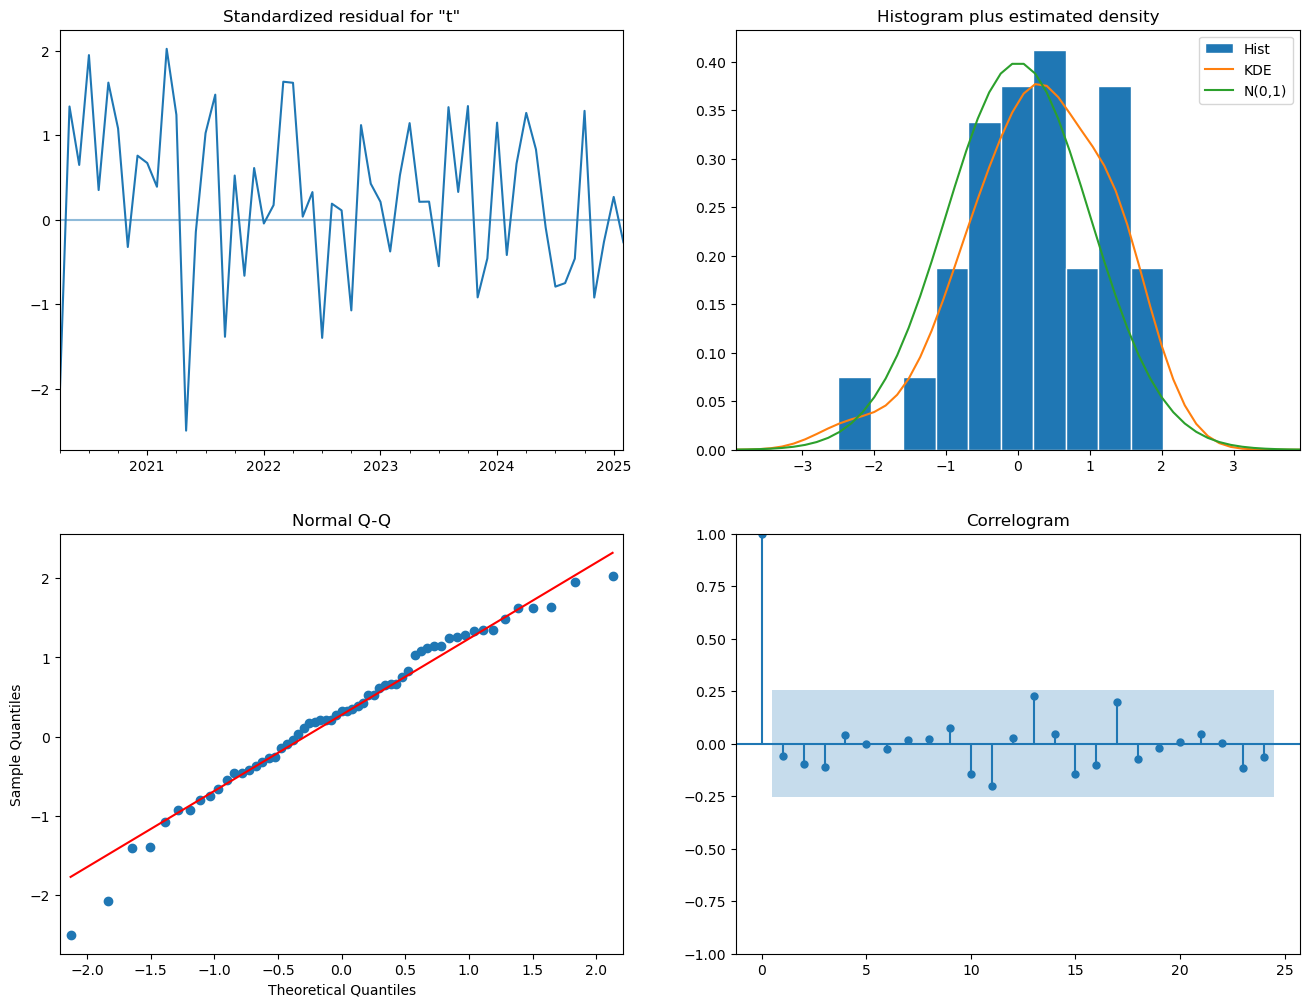

In [145]:
model.plot_diagnostics(lags=24, figsize=(16,12))

The above graph shows model residuals.
The diagnostic helps assess whether the model residuals (errors) behave like white noise, which is a key requirement for a well-fitted time series model.

1. Standardized Residuals Over Time
What it shows: The time series of residuals (errors) after model fitting.
Interpretation:
- Residuals are centered around 0 and look fairly random, No visible pattern, seasonality, or trend. — good indication that the model captures the main structure of the data.

2. Histogram + KDE (Kernel Density Estimate)
What it shows: Distribution of residuals and how close it is to normal distribution.
Interpretation:
- Residuals resemble a normal distribution — this supports the assumption of normally distributed errors.

3. Normal Q-Q Plot
What it shows: Quantile-Quantile plot to compare residuals with a normal distribution.
Interpretation:
- Residuals lie mostly on the straight line — good sign that errors are normally distributed. Minor deviations at the tails are acceptable.

4. Correlogram (ACF of Residuals)
What it shows: Autocorrelation of residuals up to 24 lags.
Interpretation:
- Most lags fall within bounds — indicates residuals are uncorrelated (i.e., no structure left unexplained by the model).

### ETS Model Vs SARIMAX

ETS Model Forecast :The forecast continues the historical seasonal pattern, but shows a declining trend after 2024.

- Captures seasonality well but misses the upward trend from previous years.

- Appears more conservative in estimating future growth.

Evaluation Metrics :

MAPE: ~7.2%

RMSE: ~16,640

RMSPE: ~9.1%

- Interpretation:
Good accuracy, low error. But forecast might underpredict if the upward trend continues into 2025.

SARIMAX Model Forecast: Forecast continues the strong upward trend seen in the data until 2024.

- Seasonal structure is preserved, and no sudden dips or jumps are seen.

- Forecast looks smoother and more optimistic compared to ETS.

- Evaluation Metrics (as shared earlier for SARIMAX):
  
MAPE: ~7.6%

RMSE: ~14,617

RMSPE: ~8.38%

- Interpretation:
Even better RMSE and RMSPE than ETS. Captures the growth pattern more accurately.

